<a href="https://colab.research.google.com/github/Junedaktar/Capstone-3--Mobile-range-prediction/blob/main/Mobile_range_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Mobile price range prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual

# **Project Summary -**

This is the mobile data and providing the specifiaction of the mobile, and price range of the data. The project summary includes Data preprocessing , Exploratory Data Analysis,Implementation of Machine Learning Models. 

# **GitHub Link -**

https://github.com/Junedaktar/Capstone-3--Mobile-range-prediction.git

# **Problem Statement**


 **In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory, Camera etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [126]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset Loading

In [127]:
# Load Dataset
df=pd.read_csv('/content/data_mobile_price_range.csv')

### Dataset First View

In [128]:
# Dataset First Look
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### Dataset Rows & Columns count

In [129]:
# Dataset Rows & Columns counts
df.shape

(2000, 21)

### Dataset Information

In [130]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Duplicate Values

In [131]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [132]:
# Missing Values/Null Values Count
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

## ***2. Understanding Your Variables***

In [133]:
# Dataset Columns
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [134]:
# Dataset Describe
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Variables Description 

Battery_power - Total energy a battery can store in one time measured in MAH.

Blue - Has bluetooth or not.

Clock_speed - speed at which microprocessor executes instructions.

Dual_sim - Has dual sim support or not.

Fc - Front Camera mega pixels.

Four_g - Has 4G or not.

Int_memory - Internal Memory in Gigabytes.

M_dep - Mobile Depth in cm.

Mobile_wt - Weight of mobile phone.

N_cores - Number of cores of processor.

Pc - Primary Camera mega pixels.

Px_height - Pixel Resolution Height.

Px_width - Pixel Resolution Width.

Ram - Random Access Memory in Mega Bytes.

Sc_h - Screen Height of mobile in cm.

Sc_w - Screen Width of mobile in cm.

Talk_time - longest time that a single battery charge will last time.

Three_g - Has 3G or not.

Touch_screen - Has touch screen or not.

Wifi - Has wifi or not.

Price_range - This is the target variable with value of 0(low cost),1(medium cost),

2(high cost) and 3(very high cost).

### Check Unique Values for each variable.

In [135]:
# Check Unique Values for each variable.
df['battery_power'].unique()

array([ 842, 1021,  563, ..., 1139, 1467,  858])

In [136]:
df['blue'].unique()

array([0, 1])

In [137]:
df['clock_speed'].unique()

array([2.2, 0.5, 2.5, 1.2, 1.7, 0.6, 2.9, 2.8, 2.1, 1. , 0.9, 1.1, 2.6,
       1.4, 1.6, 2.7, 1.3, 2.3, 2. , 1.8, 3. , 1.5, 1.9, 2.4, 0.8, 0.7])

In [138]:
df['dual_sim'].unique()

array([0, 1])

In [139]:
df['fc'].unique()

array([ 1,  0,  2, 13,  3,  4,  5,  7, 11, 12, 16,  6, 15,  8,  9, 10, 18,
       17, 14, 19])

In [140]:
df['four_g'].unique()

array([0, 1])

In [141]:
df['int_memory'].unique()

array([ 7, 53, 41, 10, 44, 22, 24,  9, 33, 17, 52, 46, 13, 23, 49, 19, 39,
       47, 38,  8, 57, 51, 21,  5, 60, 61,  6, 11, 50, 34, 20, 27, 42, 40,
       64, 14, 63, 43, 16, 48, 12, 55, 36, 30, 45, 29, 58, 25,  3, 54, 15,
       37, 31, 32,  4, 18,  2, 56, 26, 35, 59, 28, 62])

In [142]:
df['m_dep'].unique()

array([0.6, 0.7, 0.9, 0.8, 0.1, 0.5, 1. , 0.3, 0.4, 0.2])

In [143]:
df['mobile_wt'].unique()

array([188, 136, 145, 131, 141, 164, 139, 187, 174,  93, 182, 177, 159,
       198, 185, 196, 121, 101,  81, 156, 199, 114, 111, 132, 143,  96,
       200,  88, 150, 107, 100, 157, 160, 119,  87, 152, 166, 110, 118,
       162, 127, 109, 102, 104, 148, 180, 128, 134, 144, 168, 155, 165,
        80, 138, 142,  90, 197, 172, 116,  85, 163, 178, 171, 103,  83,
       140, 194, 146, 192, 106, 135, 153,  89,  82, 130, 189, 181,  99,
       184, 195, 108, 133, 179, 147, 137, 190, 176,  84,  97, 124, 183,
       113,  92,  95, 151, 117,  94, 173, 105, 115,  91, 112, 123, 129,
       154, 191, 175,  86,  98, 125, 126, 158, 170, 161, 193, 169, 120,
       149, 186, 122, 167])

In [144]:
df['n_cores'].unique()

array([2, 3, 5, 6, 1, 8, 4, 7])

In [145]:
df['pc'].unique()

array([ 2,  6,  9, 14,  7, 10,  0, 15,  1, 18, 17, 11, 16,  4, 20, 13,  3,
       19,  8,  5, 12])

In [146]:
df['px_height'].unique()

array([  20,  905, 1263, ...,  528,  915,  483])

In [147]:
df['px_width'].unique()

array([ 756, 1988, 1716, ...,  743, 1890, 1632])

In [148]:
df['ram'].unique()

array([2549, 2631, 2603, ..., 2032, 3057, 3919])

In [149]:
df['sc_h'].unique()

array([ 9, 17, 11, 16,  8, 13, 19,  5, 14, 18,  7, 10, 12,  6, 15])

In [150]:
df['talk_time'].unique()

array([19,  7,  9, 11, 15, 10, 18,  5, 20, 12, 13,  2,  4,  3, 16,  6, 14,
       17,  8])

In [151]:
df['sc_w'].unique()

array([ 7,  3,  2,  8,  1, 10,  9,  0, 15, 13,  5, 11,  4, 12,  6, 17, 14,
       16, 18])

In [152]:
df['three_g'].unique()

array([0, 1])

In [153]:
df['touch_screen'].unique()

array([0, 1])

In [154]:
df['wifi'].unique()

array([1, 0])

In [155]:
df['price_range'].unique()

array([1, 2, 3, 0])

## 3. ***Data Wrangling***

### Data Wrangling Code

In [156]:
# Checking How many observations having sc_w value as 0.
df[df['sc_w']==0]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
12,1815,0,2.8,0,2,0,33,0.6,159,4,...,607,748,1482,18,0,2,1,0,0,1
24,503,0,1.2,1,5,1,8,0.4,111,3,...,201,1245,2583,11,0,12,1,0,0,1
33,1310,1,2.2,1,0,1,51,0.6,100,4,...,178,1919,3845,7,0,12,1,1,0,3
42,1253,1,0.5,1,5,1,5,0.2,152,2,...,685,714,1878,15,0,4,1,1,0,1
50,1547,1,3.0,1,2,1,14,0.7,198,3,...,1042,1832,2059,5,0,15,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,772,0,1.0,1,0,1,23,0.6,97,7,...,317,1805,2782,7,0,17,1,0,0,2
1920,591,1,0.5,1,1,1,16,0.9,90,6,...,892,1603,3746,5,0,5,1,1,0,3
1946,590,1,1.2,1,0,0,32,0.4,141,6,...,227,509,1817,10,0,6,0,1,0,0
1954,686,1,2.7,1,0,0,36,0.1,194,4,...,64,745,1503,10,0,13,0,0,0,0


In [157]:
# Checking How many observations having px_height value as 0.
df[df['px_height']==0]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1481,1834,0,2.1,0,7,1,40,0.1,99,4,...,0,1987,3692,13,0,16,1,1,0,3
1933,897,1,2.0,0,3,1,2,0.6,154,8,...,0,994,1958,7,5,7,1,1,0,1


In [158]:
# Where px_height and sc_w value is 0, assigning them with mean value
df['sc_w'][df['sc_w']==0]=int(df['sc_w'].mean()) 

<ipython-input-158-ac24c87b62c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sc_w'][df['sc_w']==0]=int(df['sc_w'].mean())


In [159]:
df['px_height'][df['px_height']==0]=int(df['px_height'].mean()) 

<ipython-input-159-f5c443dcbb5d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['px_height'][df['px_height']==0]=int(df['px_height'].mean())


In [160]:
df['px_height'][df['px_height']==20]=int(df['px_height'].mean())

<ipython-input-160-918ee9039b7d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['px_height'][df['px_height']==20]=int(df['px_height'].mean())


### What all manipulations have you done and insights you found?

In screen width column have some 0. Screen width cannot be 0, so i replace with the mean of the screen width.
Px_height column have also some row with 0, so i replace with the mean so its perform better for modeling.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

From the above data here it we shows that,
Our dependent variable is price_range and we have four price ranges as target our values.
This dataset is a balanced dataset, i.e., each class has nearly 500 mobile phones.
(0 -> low cost, 1 -> medium cost, 2 -> high cost, 3 -> very high cost).

#### Chart - 1

In [161]:
# lets have look at our target variable's counts
data=df['price_range'].value_counts()

([<matplotlib.patches.Wedge at 0x7f649b0eeeb0>,
 [Text(0.8485281374238571, 0.848528137423857, 'Low-Cost'),
  Text(-0.848528137423857, 0.8485281374238571, 'Medium-Cost'),
  Text(-0.8485281374238572, -0.848528137423857, 'High-Cost'),
  Text(0.8485281374238569, -0.8485281374238572, 'VeryHigh-Cost')],
 [Text(0.4949747468305833, 0.4949747468305832, '25.0%'),
  Text(-0.4949747468305832, 0.4949747468305833, '25.0%'),
  Text(-0.4949747468305834, -0.4949747468305832, '25.0%'),
  Text(0.4949747468305831, -0.4949747468305834, '25.0%')])

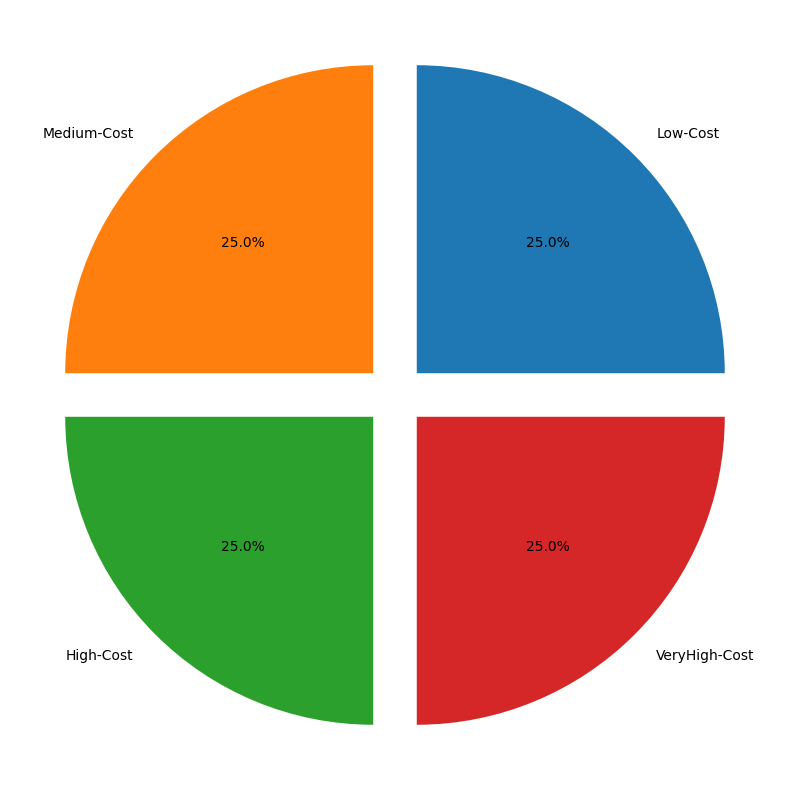

In [162]:
# visualization code
labelling = ['Low-Cost', 'Medium-Cost', 'High-Cost', 'VeryHigh-Cost']
plt.figure(figsize=(10,10))
plt.pie(data,labels=labelling,explode=[0.1,0.1,0.1,0.1],autopct='%.1f%%')

##### 1. Why did you pick the specific chart?

In pie chat we can check how the cost data is differ

##### 2. What is/are the insight(s) found from the chart?

Here we shows that count of in each category of price range is similiar .

#### Chart - 2

Text(0, 0.5, 'Ram')

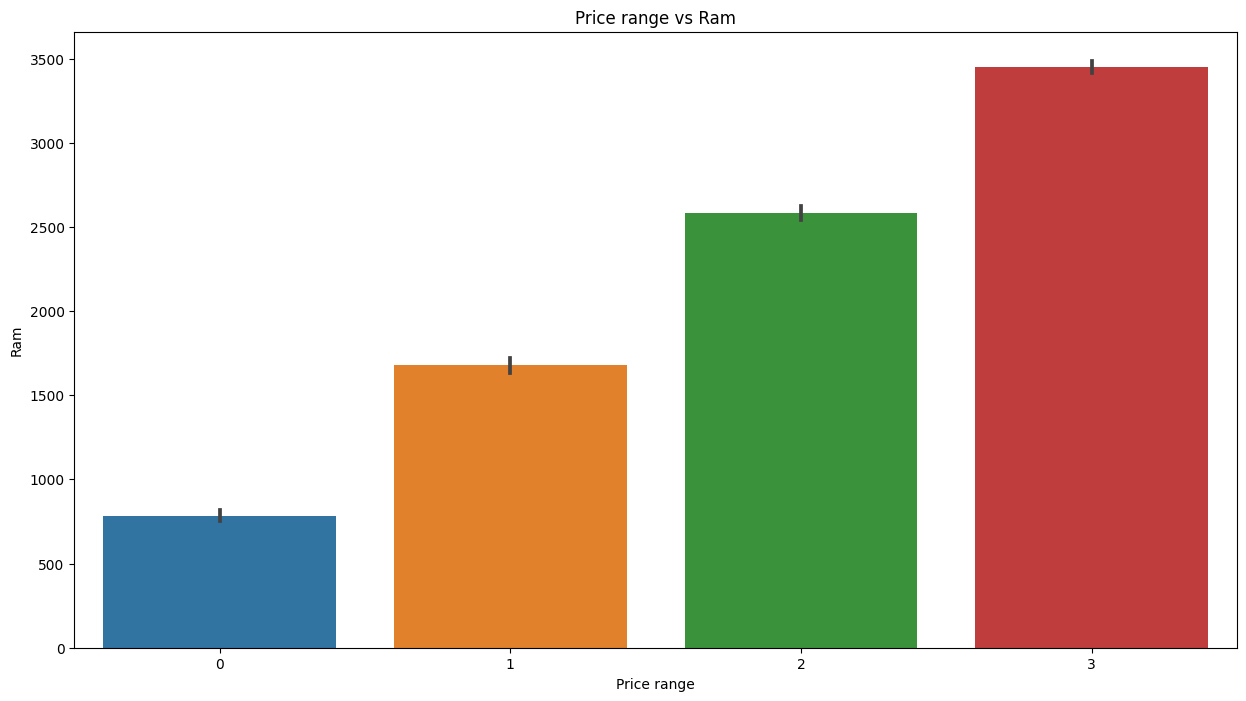

In [163]:
# Chart - 2 visualization code
plt.figure(figsize=(15,8))
sns.barplot(x=df['price_range'],y=df['ram'])
plt.title('Price range vs Ram')
plt.xlabel('Price range')
plt.ylabel('Ram')

##### 1. Why did you pick the specific chart?

Using this Bar plot it shows that how Ram impact on the mobile price range

##### 2. What is/are the insight(s) found from the chart?

Using this Bar plot it shows that as far as RAM specifications such as bytes are increase ,then price range is also increased. As i can check there is positive correlation seems between these variables.

#### Chart - 3

Text(0, 0.5, 'Battery power')

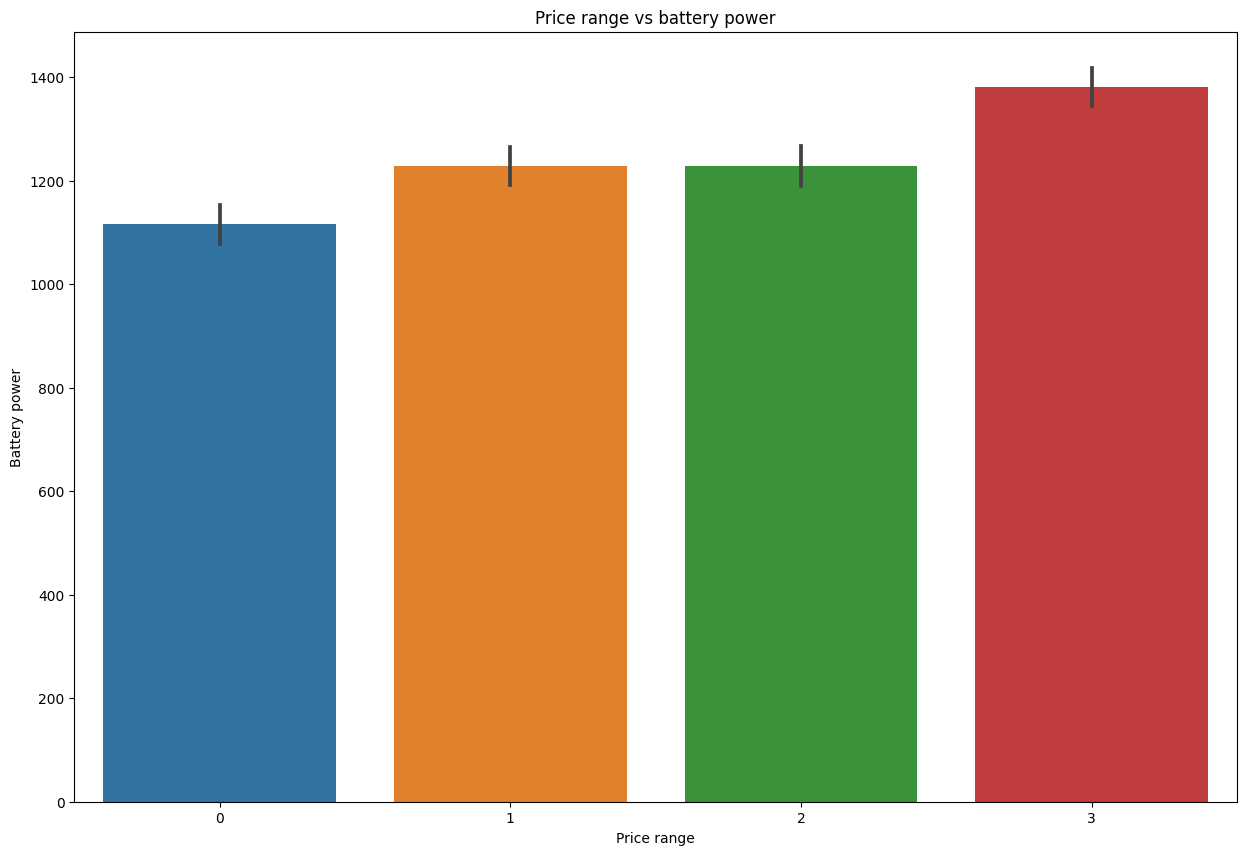

In [164]:
# Chart - 3 visualization code
plt.figure(figsize=(15,10))
sns.barplot(x=df['price_range'],y=df['battery_power'])
plt.title('Price range vs battery power')
plt.xlabel('Price range')
plt.ylabel('Battery power')

##### 1. Why did you pick the specific chart?

Bar plot helps to relationship between the two variables

##### 2. What is/are the insight(s) found from the chart?

Mobiles with battery power more than 1300 MAH has very high cost. And Mobiles with battery power between 1200 and 1300 MAH falls under medium and high cost category.

#### Chart - 4

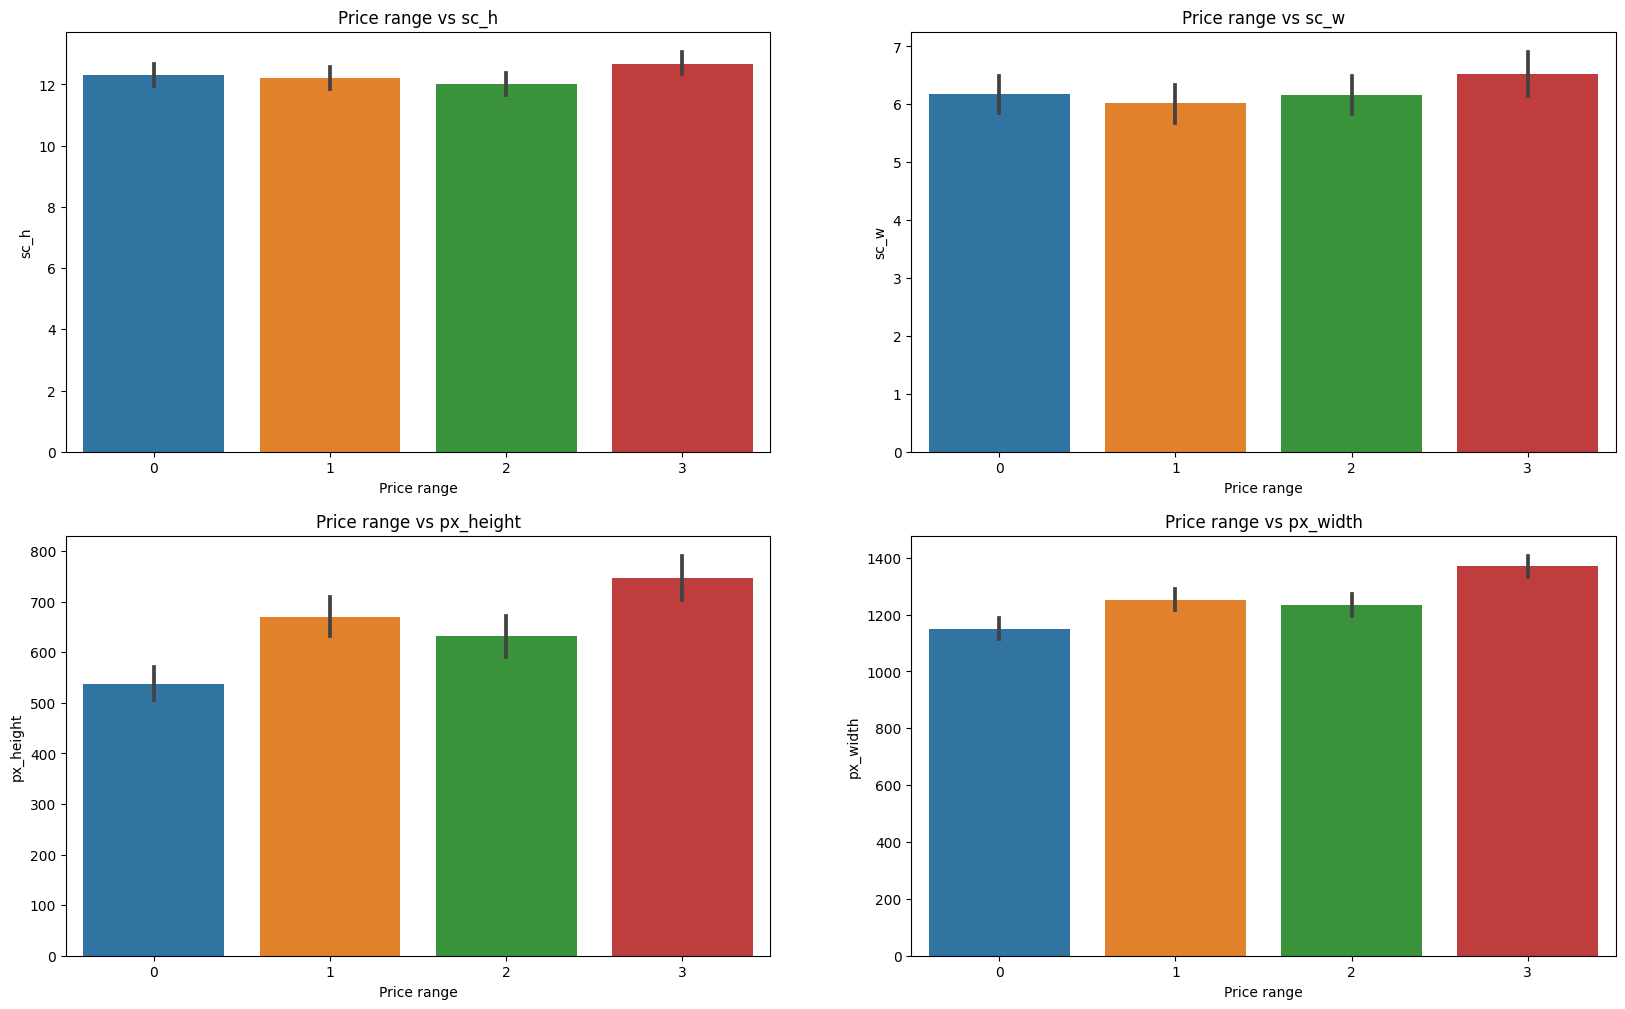

In [165]:
# Chart - 4 visualization code
variables=['sc_h','sc_w','px_height','px_width']
plt.figure(figsize=(20,12))
row=2
column=2
counter=1
for val in variables:
  plt.subplot(row,column,counter)
  sns.barplot(x=df['price_range'],y=df[val])
  plt.title(f'Price range vs {val}')
  plt.xlabel('Price range')
  plt.ylabel(f'{val}')
  counter=counter+1

##### 1. Why did you pick the specific chart?

Bar plot helps to relationship between the two variables

##### 2. What is/are the insight(s) found from the chart?

Mobiles with more than 700 pixel height and width more than 1300 width has very high cost. Mobiles screen height and width has some impact on price range.

#### Chart - 5

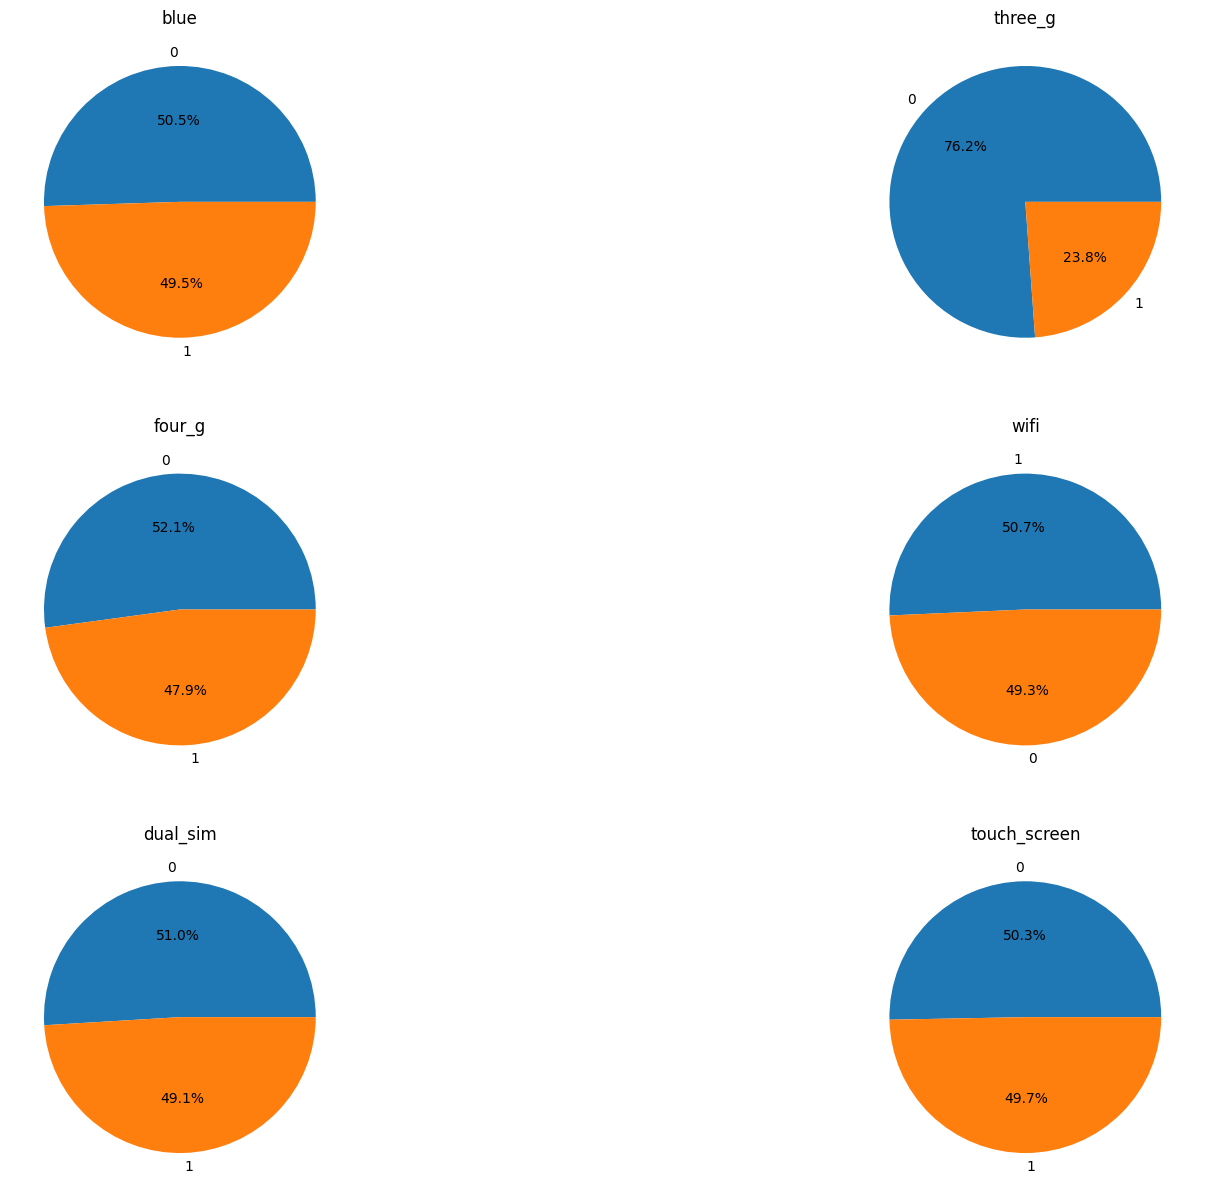

In [166]:
# Chart - 5 visualization code
variable=['blue','three_g','four_g','wifi','dual_sim','touch_screen']
plt.figure(figsize=(20,15))
row=3
column=2
counter=1

for v in variable:
  plt.subplot(row,column,counter)
  plt.pie(df[v].value_counts(),labels=df[v].unique(),autopct='%.1f%%')
  plt.title(f'{v}')
  counter=counter+1

##### 1. Why did you pick the specific chart?

Within pie chat we can check how data is spread with different variables.

##### 2. What is/are the insight(s) found from the chart?

Blue colour indicates it has the specifications,while orange colour indicates it do not have the specifications.
All features has plotted the above pie chart shows nearly 50 percent equality except 3G sim card feature, which shows nearly 76 percent mobile phones who supports the 3g .

#### Chart - 6

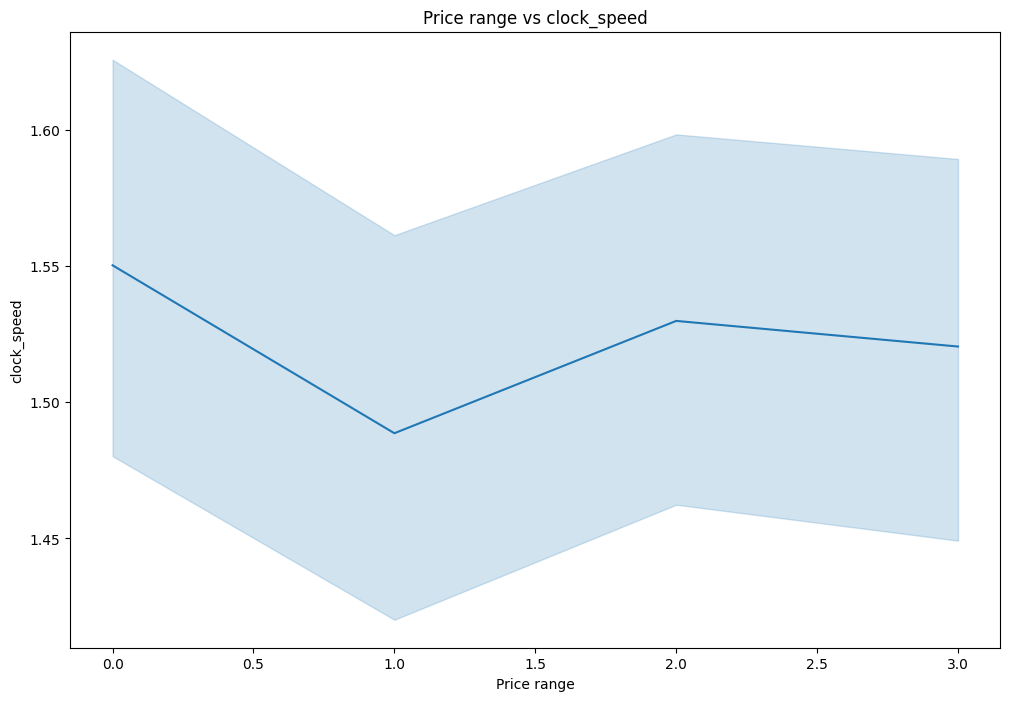

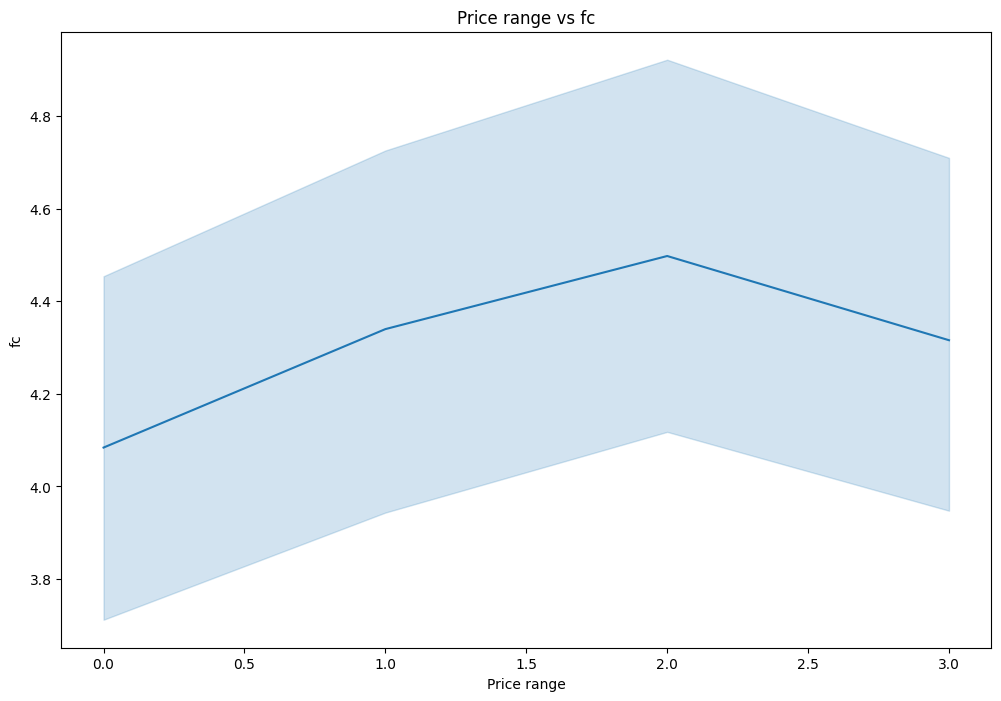

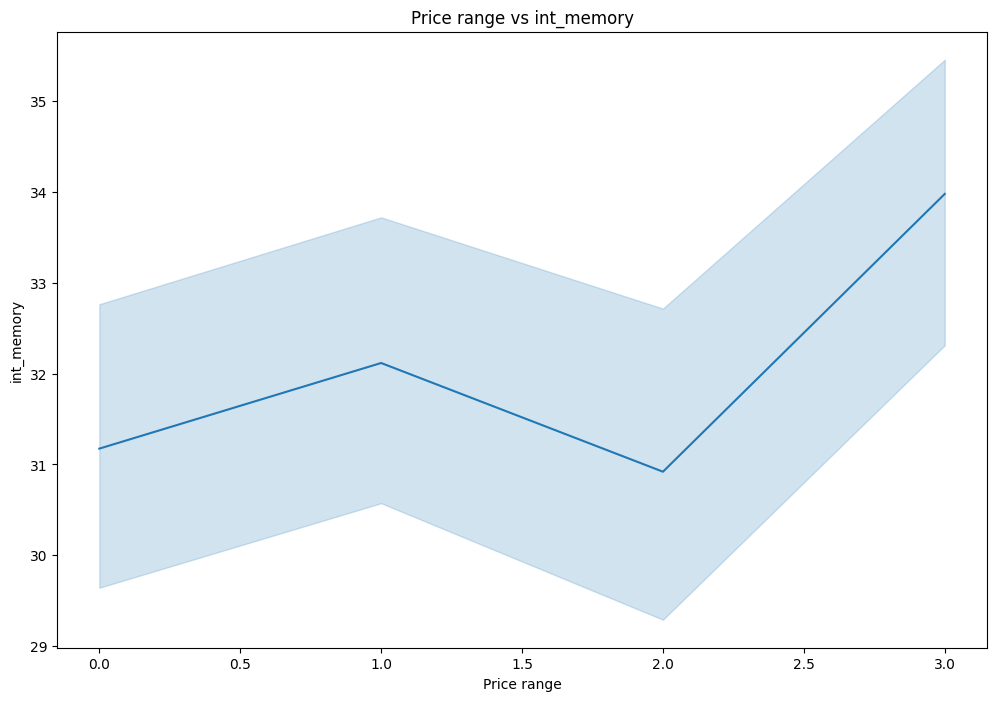

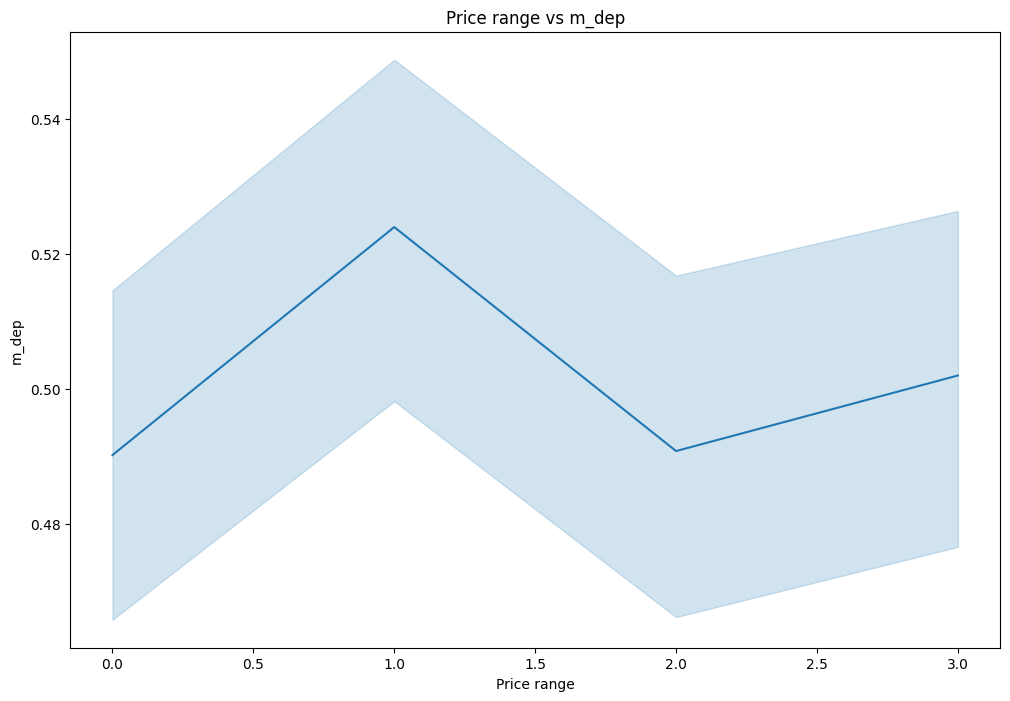

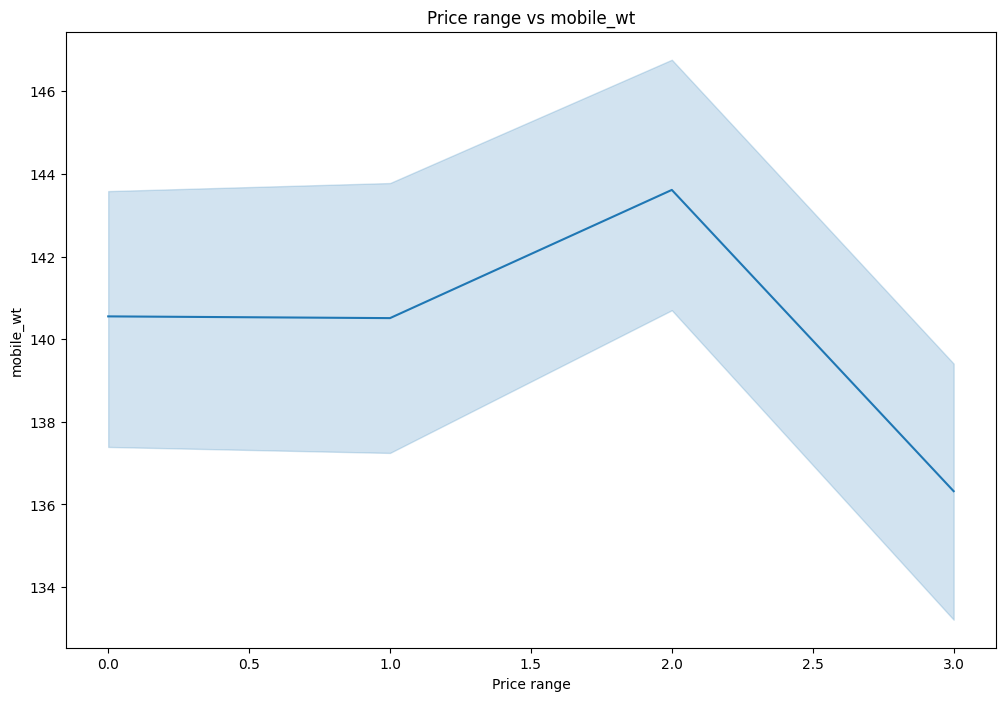

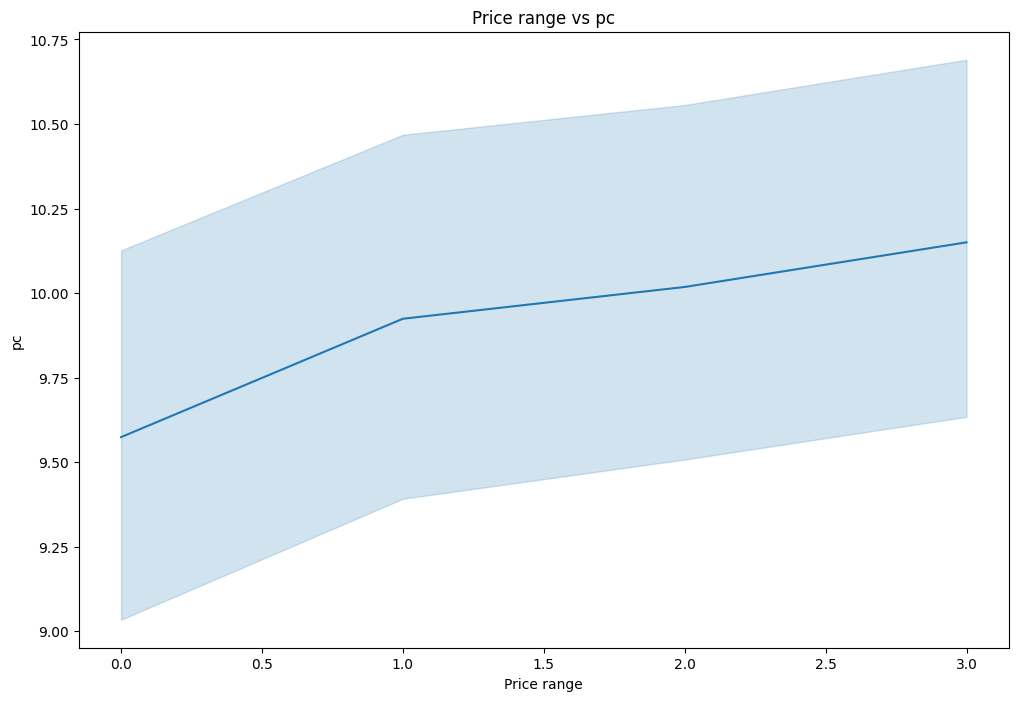

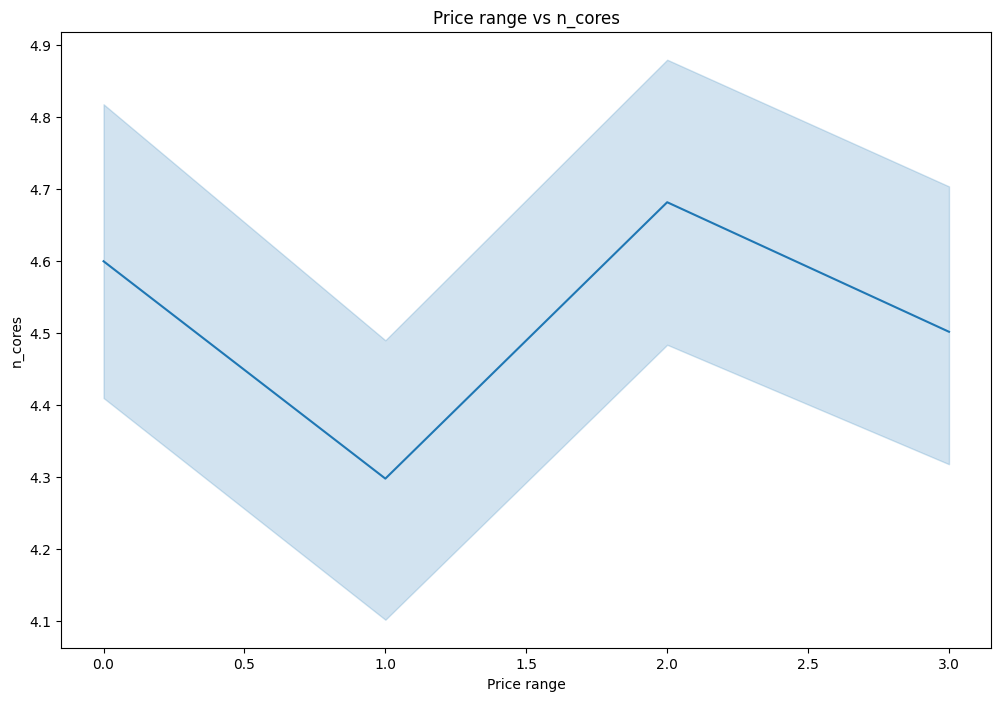

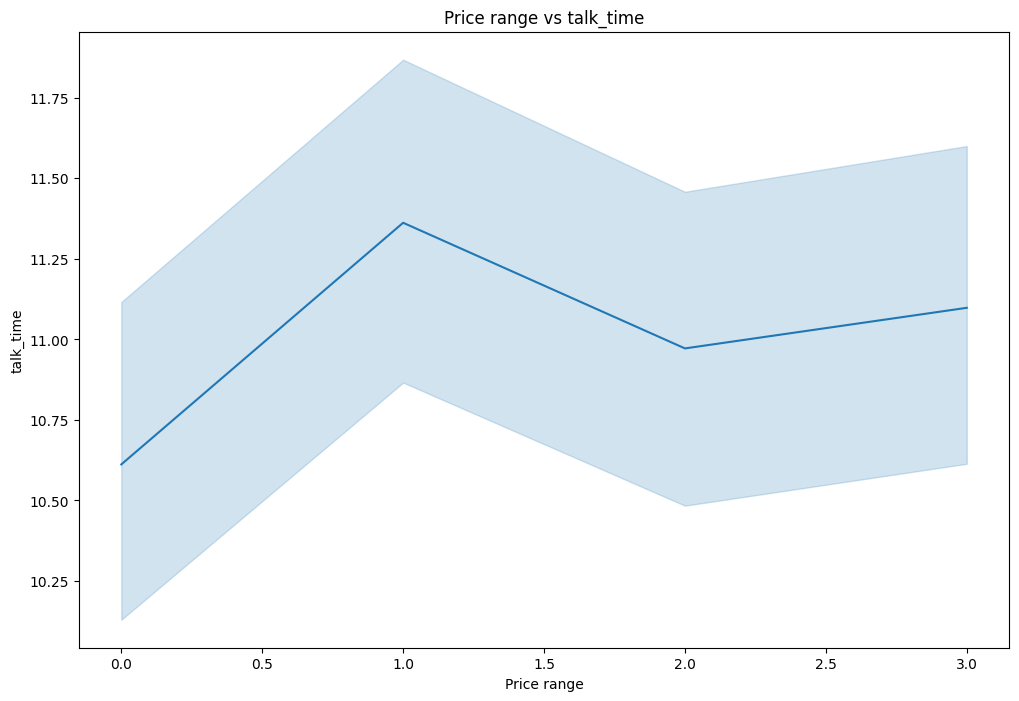

In [167]:
# Chart - 6 visualization code
feature=['clock_speed','fc','int_memory','m_dep','mobile_wt','pc','n_cores','talk_time']
for v in feature:
  plt.figure(figsize=(12,8))
  sns.lineplot(x=df['price_range'],y=df[v])
  plt.title(f'Price range vs {v}')
  plt.xlabel('Price range')
  plt.ylabel(f'{v}')

#### Chart - 7

<Axes: >

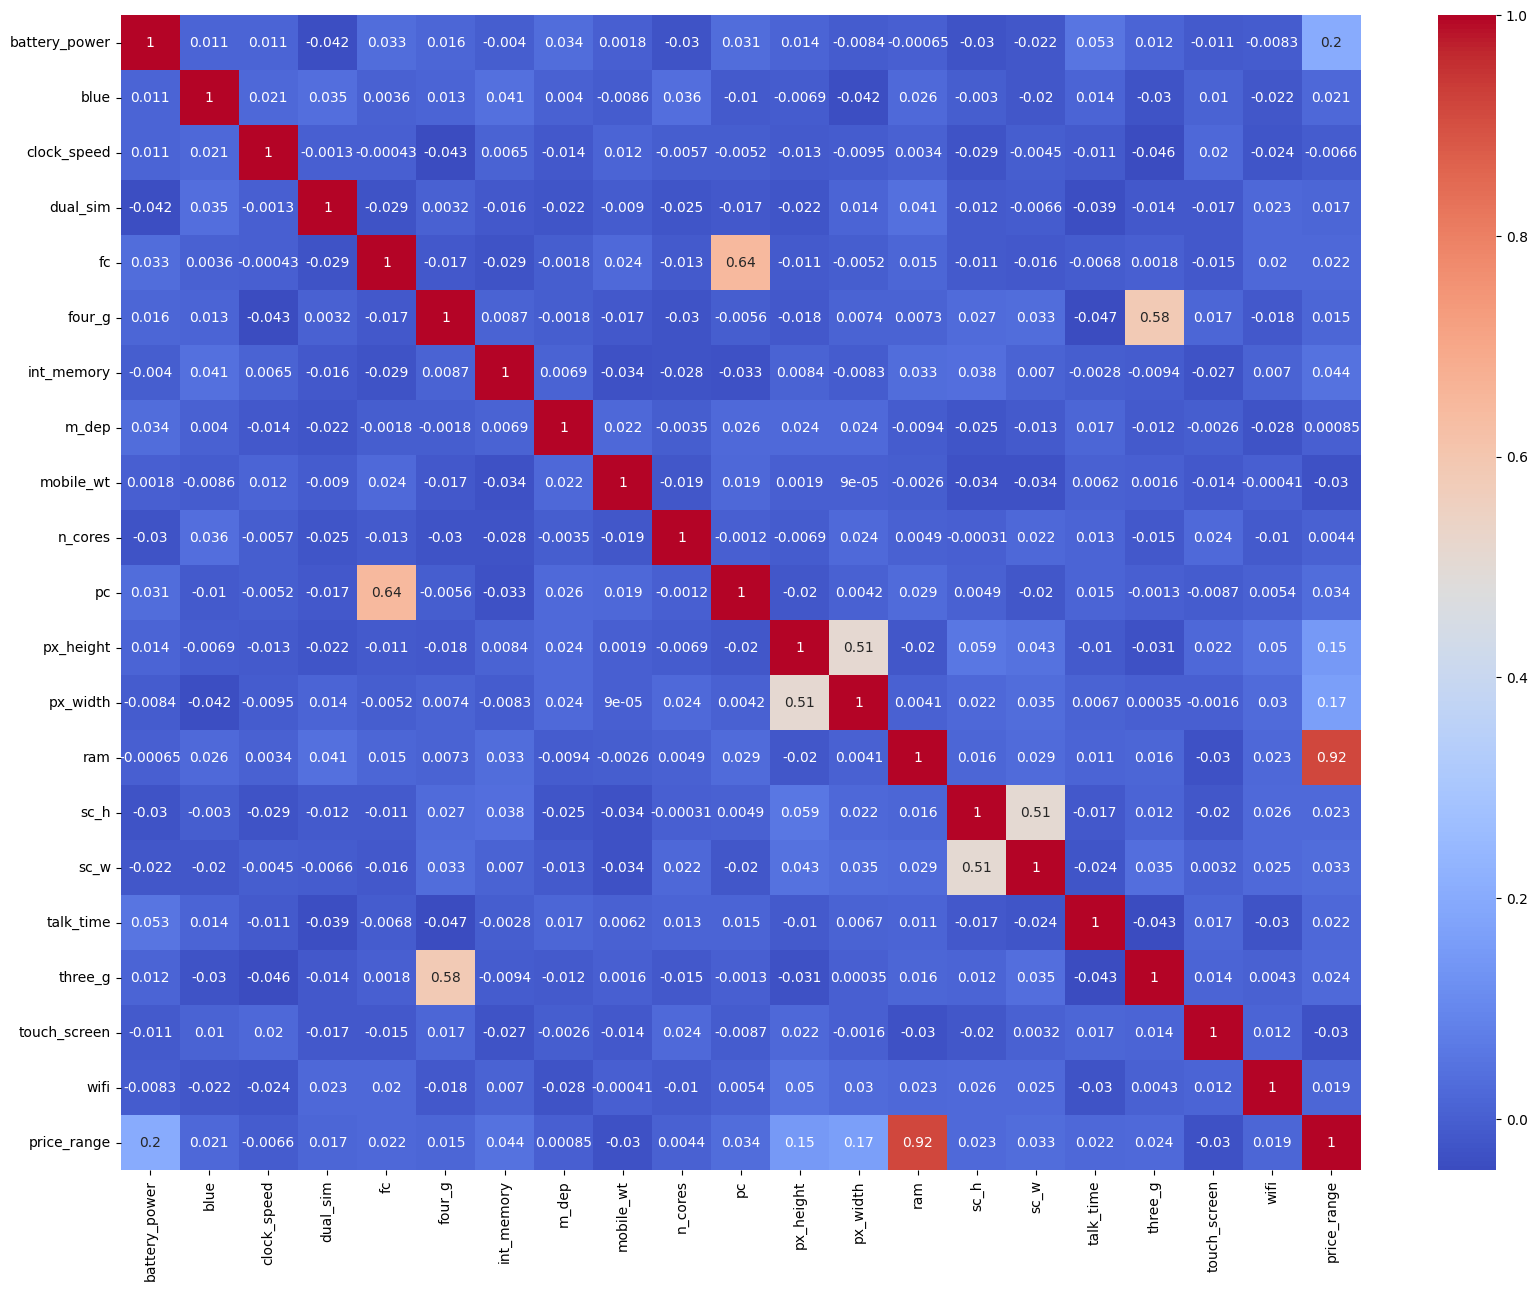

In [168]:
# Chart - 7 visualization code
plt.figure(figsize=(20,15))
data=df.corr()
sns.heatmap(data,annot=True,cmap='coolwarm')

##### 1. Why did you pick the specific chart?

Heat map shows the correlation between the variables

##### 2. What is/are the insight(s) found from the chart?

The above plot shows the correlation of variables among between them.

1. Ram(Random Access Memory) relation with price_range - RAM is the highest correlate with price of mobile phone so,it shows that it is most important and expensive feature respect to remaining all features.

2. fc(Front Camera mega pixels) relation with pc(Primary Camera mega pixels) -The relationship between front and back camera depends on the device design and its intended use, and can vary greatly from one device to another.
If a phone has a great rear camera, it has to match great standards for the front camera as well.

3. Battery power relation wih price of mobile phone - The battery of mobile is slightly positive impact on mobile because ,mobile phone's battery technology can also impact its overall performance and user experience.
Battery is managed by the phone's software and hardware can also affect its performance and lifespan.
Battery_power also has positive correlation with the price range.Generally mobiles having high prices comes with good battery power.

4. latest version four_g(4G) and existing version three_g(3G) - 4g is the latest version of mobile phone, If the phone supports 4g version it means 3g version is already exist in mobile phone and also compatible with this .

5. px_height and px_width -(Pixel Resolution Height and width) are positively correlated with price range.Generally High price range mobiles have good resolutions.

6. The Ram size and Battery power -This shows indirect (Negative) co-relationship ,from the above plot its shows that the ram size and battery power have very less correlate with each other.
The larger the ram size the more power a mobile device will consume.

7. sc_h and sc_w - It shows positively correlated with each other,

8. Mobile weight and its pixel width - It shows exponentially correlate with each other ,it shows that the effect of pixel width on mobile weight is negligible.

9. mobile depth and price range - This features are less correlate with each other it shows that the depth of mobile phone is not significantly effect on its price range as compared to RAM,Battery power,Display resolution ,camera .

Answer Here

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [169]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

### 2. Handling Outliers

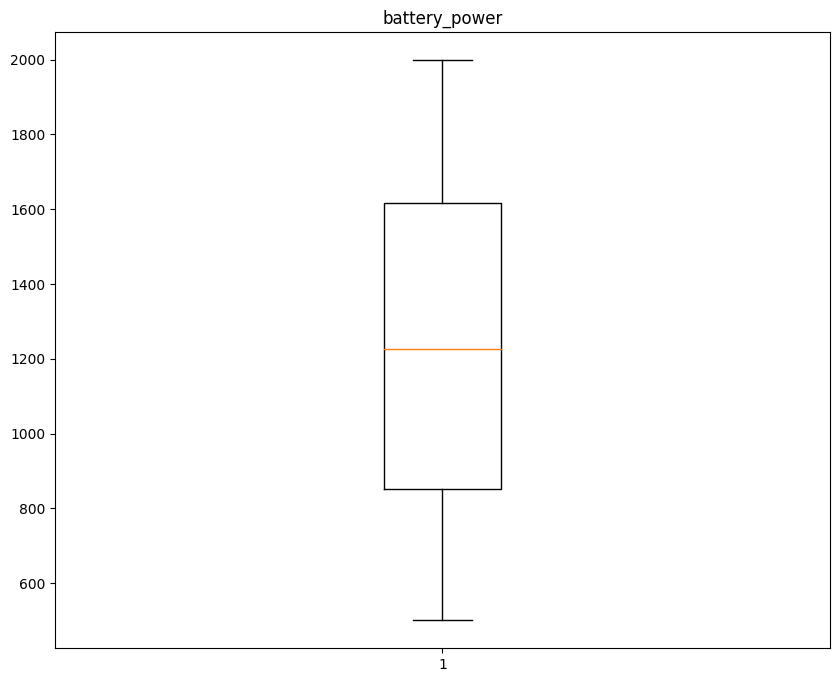

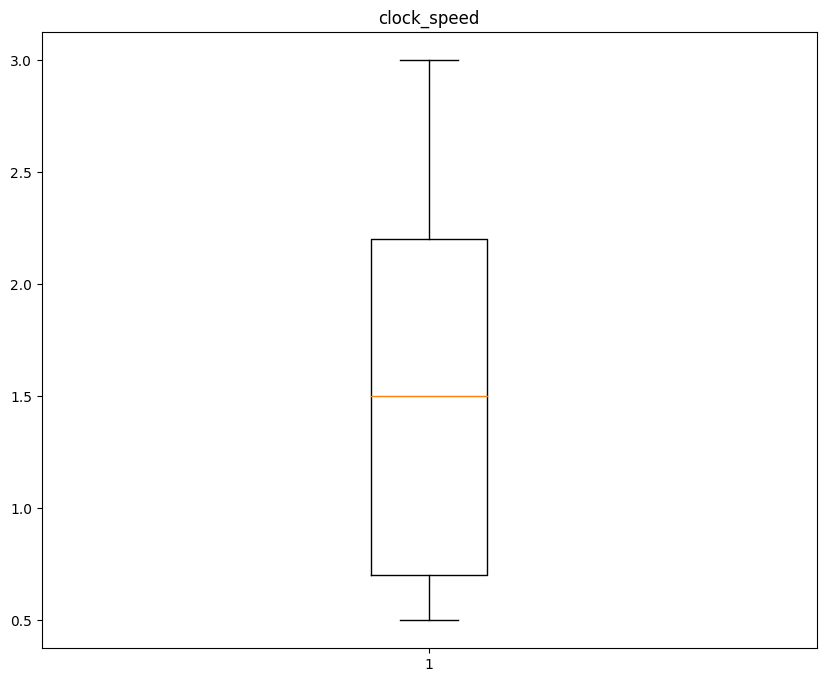

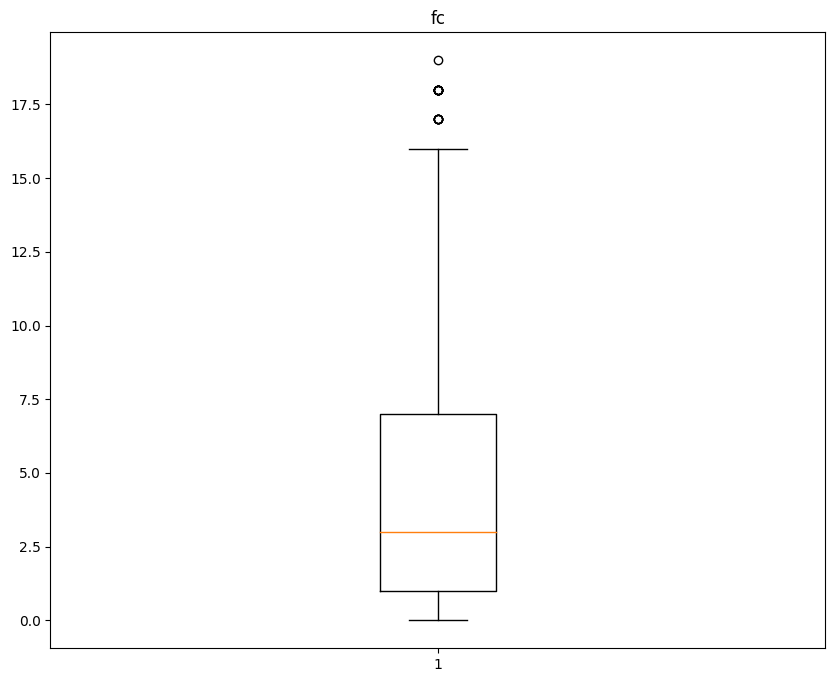

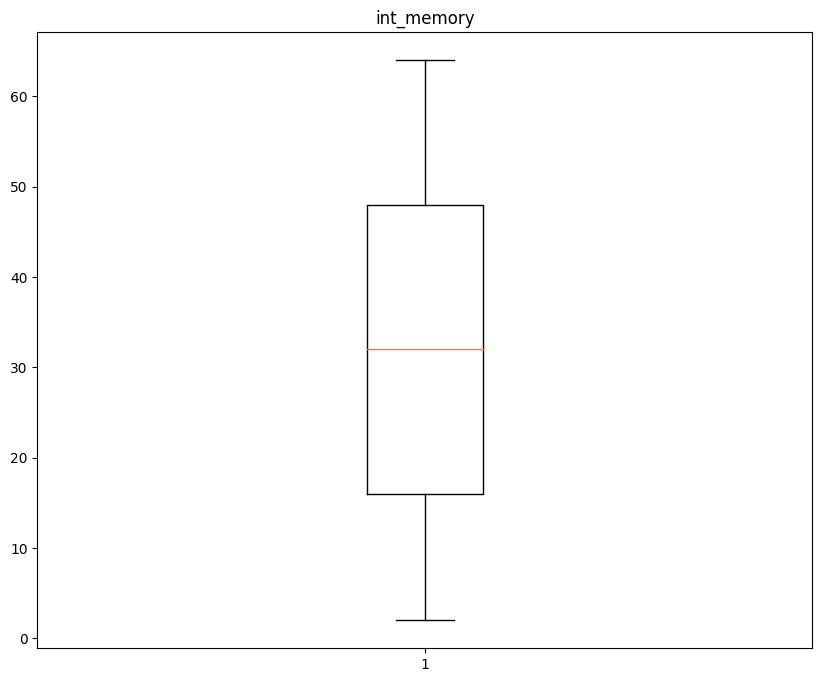

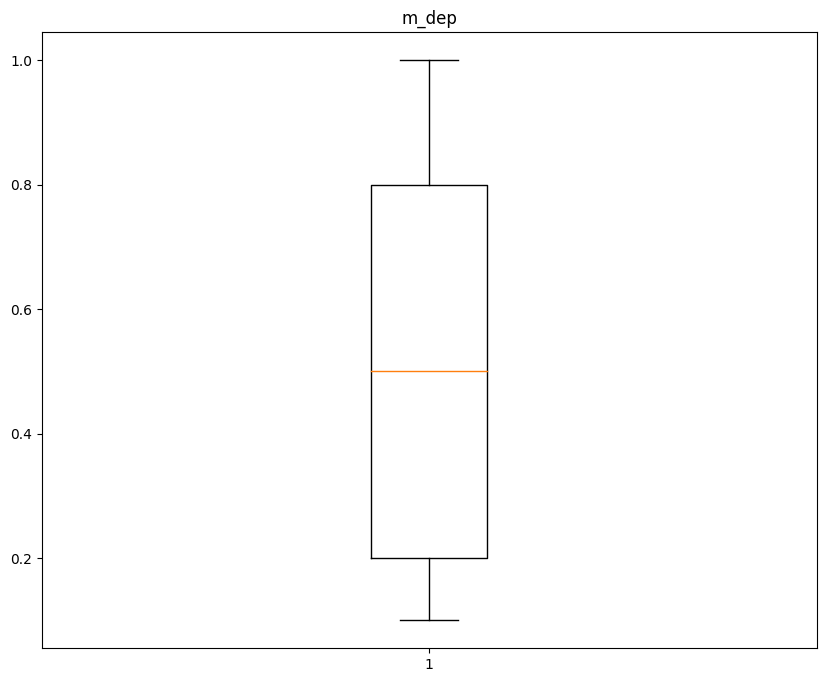

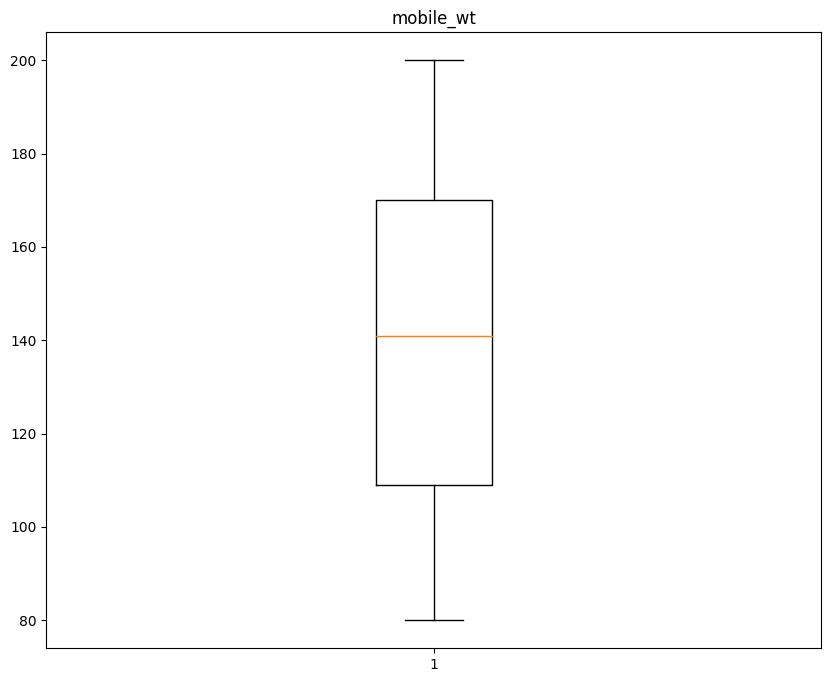

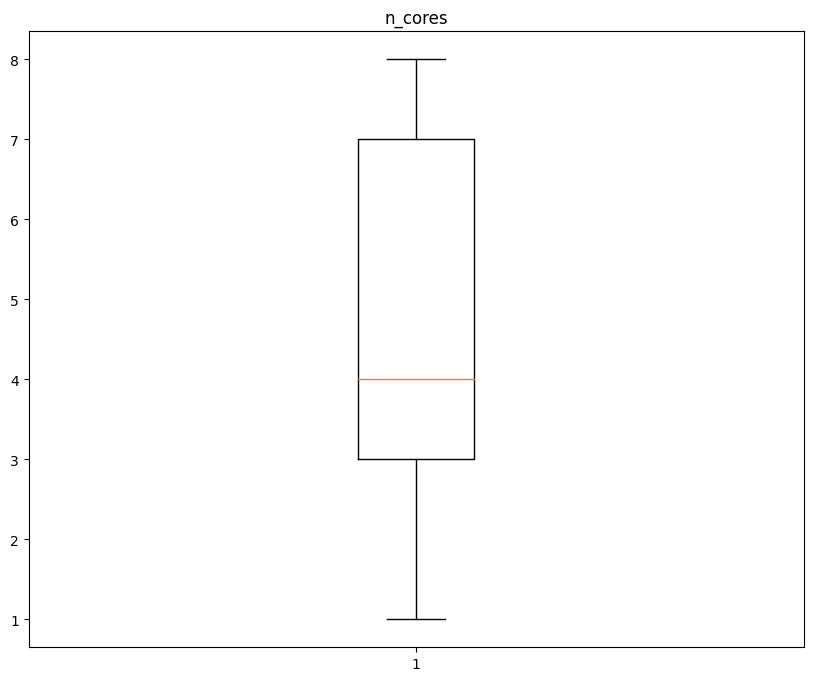

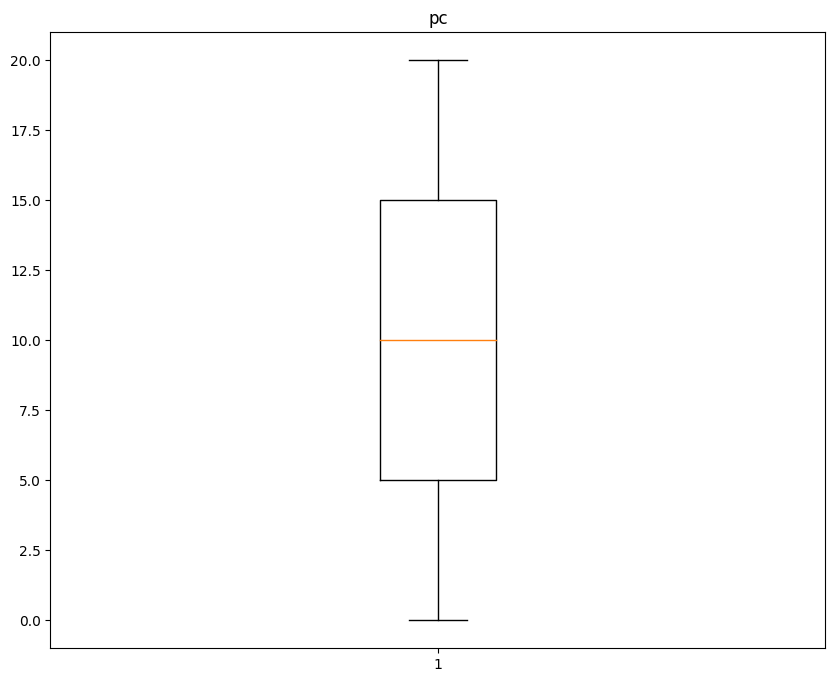

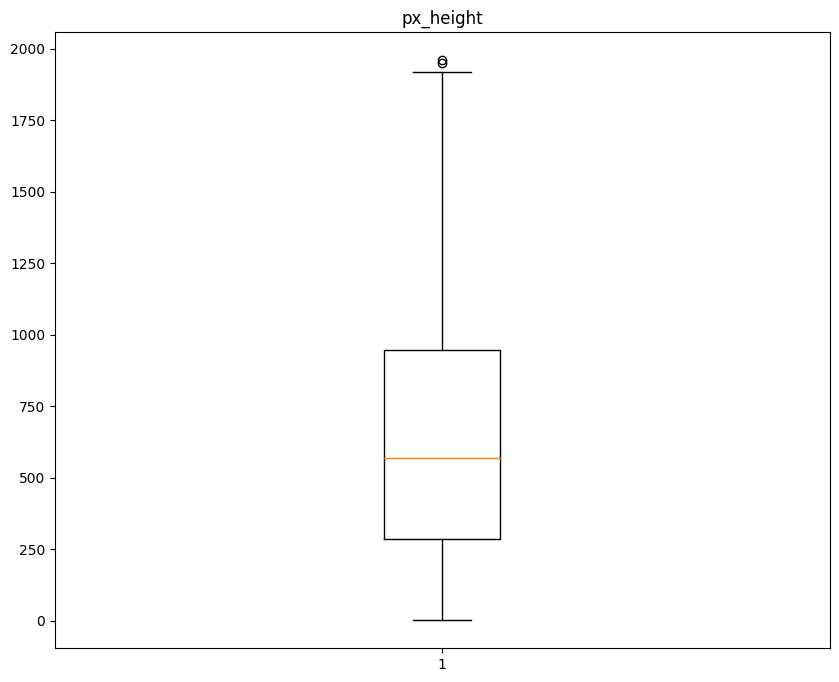

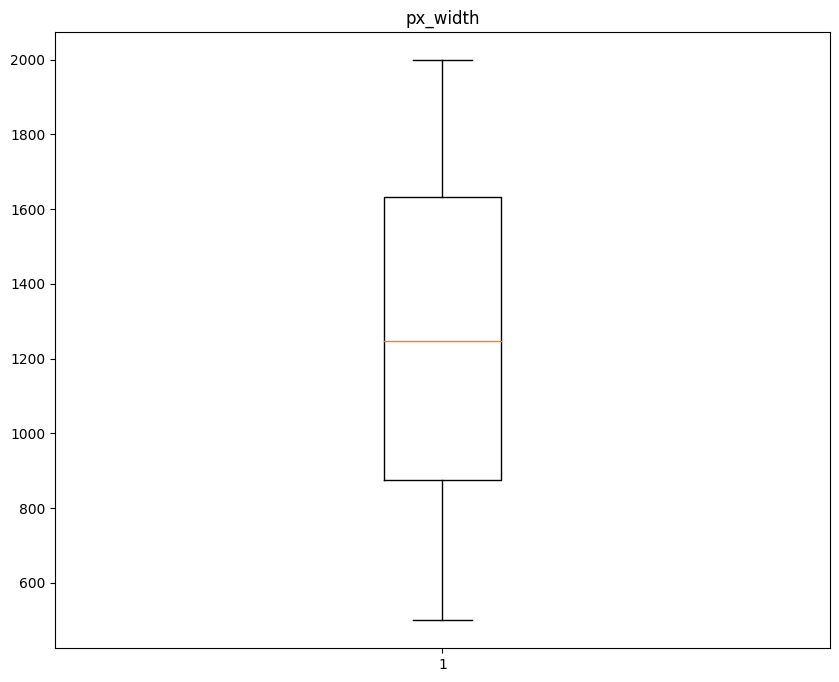

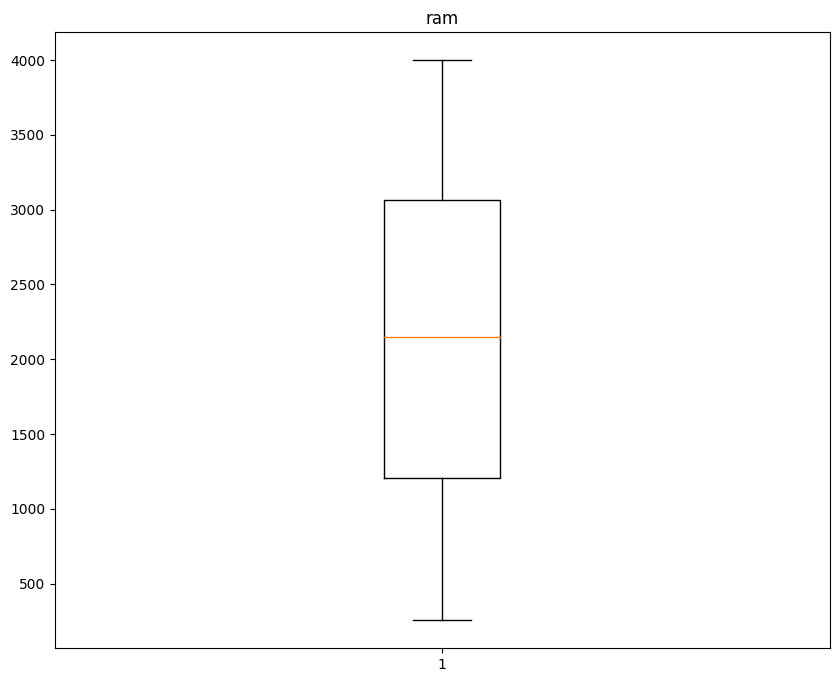

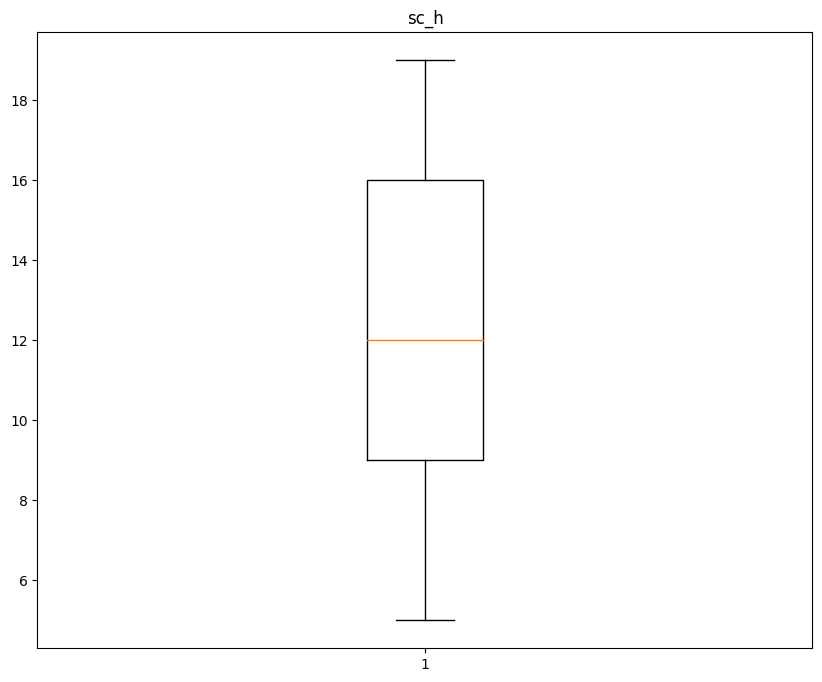

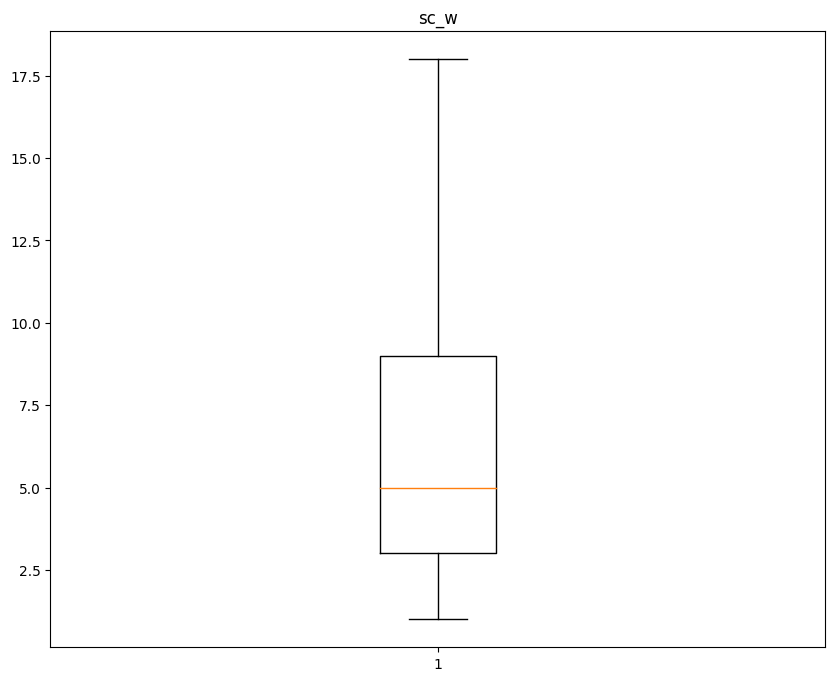

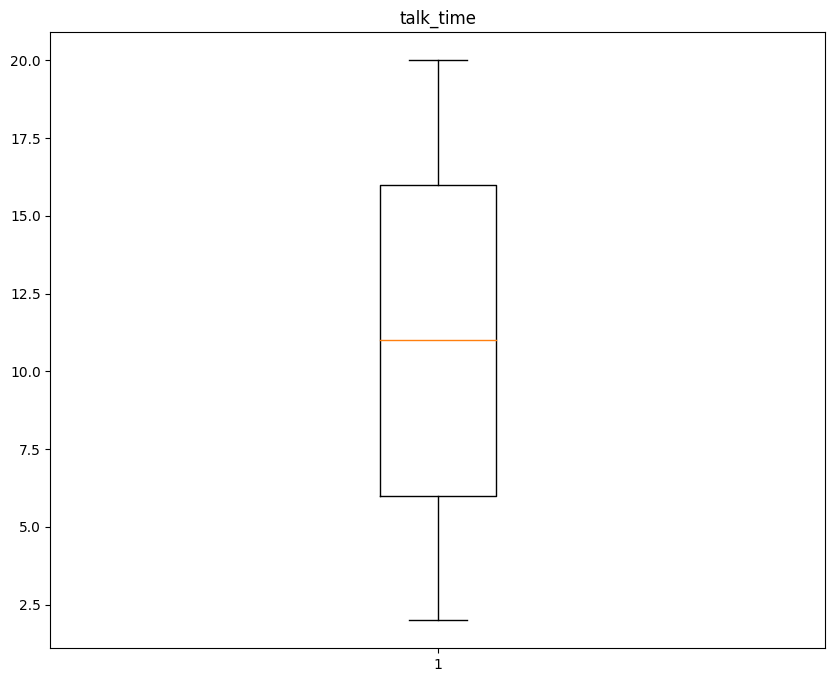

In [170]:
# Handling Outliers & Outlier treatments
feature=['battery_power','clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height','px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
for f in feature:
  plt.figure(figsize=(10,8))
  plt.boxplot(df[f])
  plt.title(f'{f}')

##### Removing the Outliers 

In [171]:
Q1 = df["fc"].quantile(0.25)
Q3 = df['fc'].quantile(0.99)
Inter_Quartile_Range = Q3-Q1

# Outliers are present after Quartile 3. so we will take datapoints before Q3.
df= df[(df['fc'] <= Q3)]

In [172]:
Q1 = df["px_height"].quantile(0.25)
Q3 = df['px_height'].quantile(0.99)
IQR = Q3-Q1

# Outliers are present after Quartile 3. so we will take datapoints before Q3.
df = df[(df['px_height'] <= Q3)]

##### What all outlier treatment techniques have you used and why did you use those techniques?

There is no such outliers in our data set. Only front camera and px height have some outliers so we remove some data after 99 percentile.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [173]:
# Manipulate Features to minimize feature correlation and create new features
df['pixel']=df['px_height']*df['px_width']
df['sc_size']=round(np.sqrt((df['sc_h']**2)+(df['sc_w']**2)),2)

In [174]:
df.drop(columns=['px_height','px_width'],axis=1,inplace=True)
df.drop(columns=['sc_h','sc_w'],axis=1,inplace=True)

### 2. Data Scaling

In [175]:
# Scaling your data
dependent='price_range'
independent=list(set(df.columns.tolist())-{dependent})

In [176]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df[independent]=scaler.fit_transform(df[independent])

In [177]:
df[independent].head()

,three_g,wifi,talk_time,pixel,mobile_wt,sc_size,n_cores,fc,int_memory,touch_screen,four_g,clock_speed,blue,m_dep,ram,battery_power,pc,dual_sim
0,-1.779811,0.991377,1.465429,-0.495350,1.351926,-0.538368,-1.105468,-0.764640,-1.383072,-0.999491,-1.038965,0.831507,-0.990367,0.341188,0.390032,-0.897401,-1.301025,-1.020069
1,0.561857,-1.008698,-0.732714,1.179286,-0.117292,0.630756,-0.667962,-1.004568,1.156554,1.000510,0.962496,-1.249973,1.009726,0.687851,0.465657,-0.489733,-0.636722,0.980326
2,0.561857,-1.008698,-0.366357,1.649388,0.136996,-0.582260,0.207052,-0.524712,0.494043,1.000510,0.962496,-1.249973,1.009726,1.381176,0.439834,-1.532817,-0.636722,0.980326
3,0.561857,-1.008698,0.000000,1.655093,-0.258562,0.756447,0.644559,-1.004568,-1.217444,-0.999491,-1.038965,1.198827,1.009726,1.034513,0.592927,-1.414388,-0.138495,-1.020069
4,0.561857,-1.008698,0.732714,0.751480,0.023979,-1.166822,-1.105468,2.114493,0.659670,1.000510,0.962496,-0.392893,1.009726,0.341188,-0.659490,1.332249,0.691883,-1.020069


##### Which method have you used to scale you data and why?

### 3. selcting the data

In [178]:
x=df[independent].values
y=df[dependent].values

### 4. Data Splitting

In [179]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train.shape)
print(x_test.shape)

(1570, 18)
(393, 18)


### 5. Handling Imbalanced Dataset

In [180]:
df['price_range'].value_counts()

0    494
1    491
2    491
3    487
Name: price_range, dtype: int64

##### Do you think the dataset is imbalanced? Explain Why.

As i can check all the outputs are equal so data is purely balanced

## ***7. ML Model Implementation***

### Logistic Regression

In [181]:
# ML Model - 1 Implementation
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(fit_intercept=True,max_iter=1000)
# Fit the Algorithm
classifier.fit(x_train,y_train)
# Predict on the model
train_pred=classifier.predict(x_train)
test_pred=classifier.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [182]:
#  Evaluation Metric Score chart- Accuracy score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(train_pred,y_train)

0.9490445859872612

In [183]:
accuracy_score(test_pred,y_test)

0.9185750636132316

In [184]:
# Evaluation Metric Score chart- Confusion matrix
cm_train=confusion_matrix(train_pred,y_train)
cm_train

array([[388,  12,   0,   0],
       [ 11, 372,  14,   0],
       [  0,  16, 372,  14],
       [  0,   0,  13, 358]])

In [185]:
cm_test=confusion_matrix(test_pred,y_test)
cm_test

array([[ 92,   1,   0,   0],
       [  3,  80,   6,   0],
       [  0,  10,  80,   6],
       [  0,   0,   6, 109]])

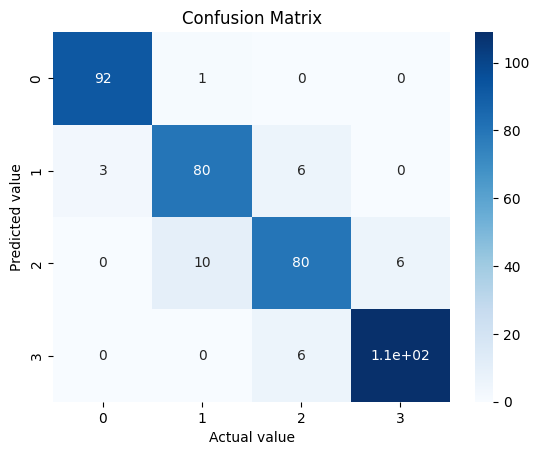

In [186]:
# Ploting the confusion matrix
ax=sns.heatmap(cm_test,annot=True,cmap='Blues')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Actual value')
ax.set_ylabel('Predicted value')
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])
plt.show()

In [187]:
#  Evaluation Metric Score chart- Classification matrix
print(classification_report(train_pred,y_train))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       400
           1       0.93      0.94      0.93       397
           2       0.93      0.93      0.93       402
           3       0.96      0.96      0.96       371

    accuracy                           0.95      1570
   macro avg       0.95      0.95      0.95      1570
weighted avg       0.95      0.95      0.95      1570



In [188]:
print(classification_report(test_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        93
           1       0.88      0.90      0.89        89
           2       0.87      0.83      0.85        96
           3       0.95      0.95      0.95       115

    accuracy                           0.92       393
   macro avg       0.92      0.92      0.92       393
weighted avg       0.92      0.92      0.92       393



#### 2. Cross- Validation & Hyperparameter Tuning

In [189]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV
parameter={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,5,8,10,20,30,40,50],'max_iter':[100,200,300,500,1000]}
classifier_regressor=GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)
# Fit the Algorithm
classifier_regressor.fit(x_train,y_train)
# Predict on the model
train_cv_pred=classifier_regressor.predict(x_train)
test_cv_pred=classifier_regressor.predict(x_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
500 fits failed out of a total of 750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceb

####3.Logistic regression model with Cross validation evaluation matrix

In [190]:
#  Evaluation Metric Score chart- Accuracy score
accuracy_score(train_cv_pred,y_train)

0.9496815286624204

In [191]:
accuracy_score(test_cv_pred,y_test)

0.9312977099236641

In [192]:
#  Evaluation Metric Score chart- Confusion matrix
cm_train=confusion_matrix(train_cv_pred,y_train)
cm_train

array([[389,  12,   0,   0],
       [ 10, 374,  15,   0],
       [  0,  14, 370,  14],
       [  0,   0,  14, 358]])

In [193]:
cm_test=confusion_matrix(test_cv_pred,y_test)
cm_test

array([[ 92,   1,   0,   0],
       [  3,  81,   3,   0],
       [  0,   9,  82,   4],
       [  0,   0,   7, 111]])

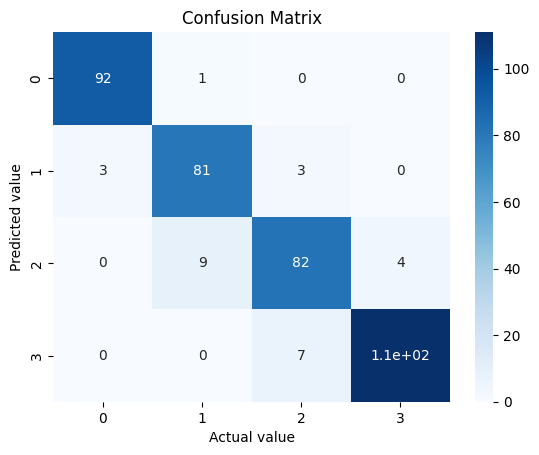

In [194]:
# Ploting the confusion matrix
ax=sns.heatmap(cm_test,annot=True,cmap='Blues')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Actual value')
ax.set_ylabel('Predicted value')
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])
plt.show()

In [195]:
#  Evaluation Metric Score chart- Classification report
print(classification_report(train_cv_pred,y_train))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       401
           1       0.94      0.94      0.94       399
           2       0.93      0.93      0.93       398
           3       0.96      0.96      0.96       372

    accuracy                           0.95      1570
   macro avg       0.95      0.95      0.95      1570
weighted avg       0.95      0.95      0.95      1570



In [196]:
print(classification_report(test_cv_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        93
           1       0.89      0.93      0.91        87
           2       0.89      0.86      0.88        95
           3       0.97      0.94      0.95       118

    accuracy                           0.93       393
   macro avg       0.93      0.93      0.93       393
weighted avg       0.93      0.93      0.93       393



##### Which hyperparameter optimization technique have you used and why?

I used the grid search cross validation and hyperparamer tunning to predict the better accuracy

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Before Tuning training accuarcy = 94%, test accuarcy = 91%
Model is overfitted the data and does not generalised well. So we tuned the hyperparameters.
After tuning: Training accuarcy= 95%, Test accuarcy = 92.5%
we have slightly improved the model and overfitting is reduced slightly.

### Decision tree 

In [197]:
# ML Model - 2 Implementation
from sklearn.tree import DecisionTreeClassifier
tree_classifier=DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=10,random_state=0)
# Fit the Algorithm
tree_classifier.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)

In [198]:
# Predict the model
train_tree_pred=tree_classifier.predict(x_train)
test_tree_pred=tree_classifier.predict(x_test)

[Text(0.4666666666666667, 0.9, 'x[14] <= 0.118\nentropy = 1.999\nsamples = 1570\nvalue = [399, 400, 399, 372]'),
 Text(0.2, 0.7, 'x[14] <= -0.813\nentropy = 1.378\nsamples = 848\nvalue = [399, 360, 89, 0]'),
 Text(0.13333333333333333, 0.5, 'entropy = 0.631\nsamples = 410\nvalue = [348, 61, 1, 0]'),
 Text(0.26666666666666666, 0.5, 'x[15] <= -0.321\nentropy = 1.202\nsamples = 438\nvalue = [51, 299, 88, 0]'),
 Text(0.13333333333333333, 0.3, 'x[14] <= -0.474\nentropy = 1.01\nsamples = 179\nvalue = [48, 126, 5, 0]'),
 Text(0.06666666666666667, 0.1, 'entropy = 0.918\nsamples = 60\nvalue = [40, 20, 0, 0]'),
 Text(0.2, 0.1, 'entropy = 0.603\nsamples = 119\nvalue = [8, 106, 5, 0]'),
 Text(0.4, 0.3, 'x[14] <= -0.212\nentropy = 0.989\nsamples = 259\nvalue = [3, 173, 83, 0]'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.763\nsamples = 182\nvalue = [3, 149, 30, 0]'),
 Text(0.4666666666666667, 0.1, 'entropy = 0.895\nsamples = 77\nvalue = [0, 24, 53, 0]'),
 Text(0.7333333333333333, 0.7, 'x[14] <= 0.8

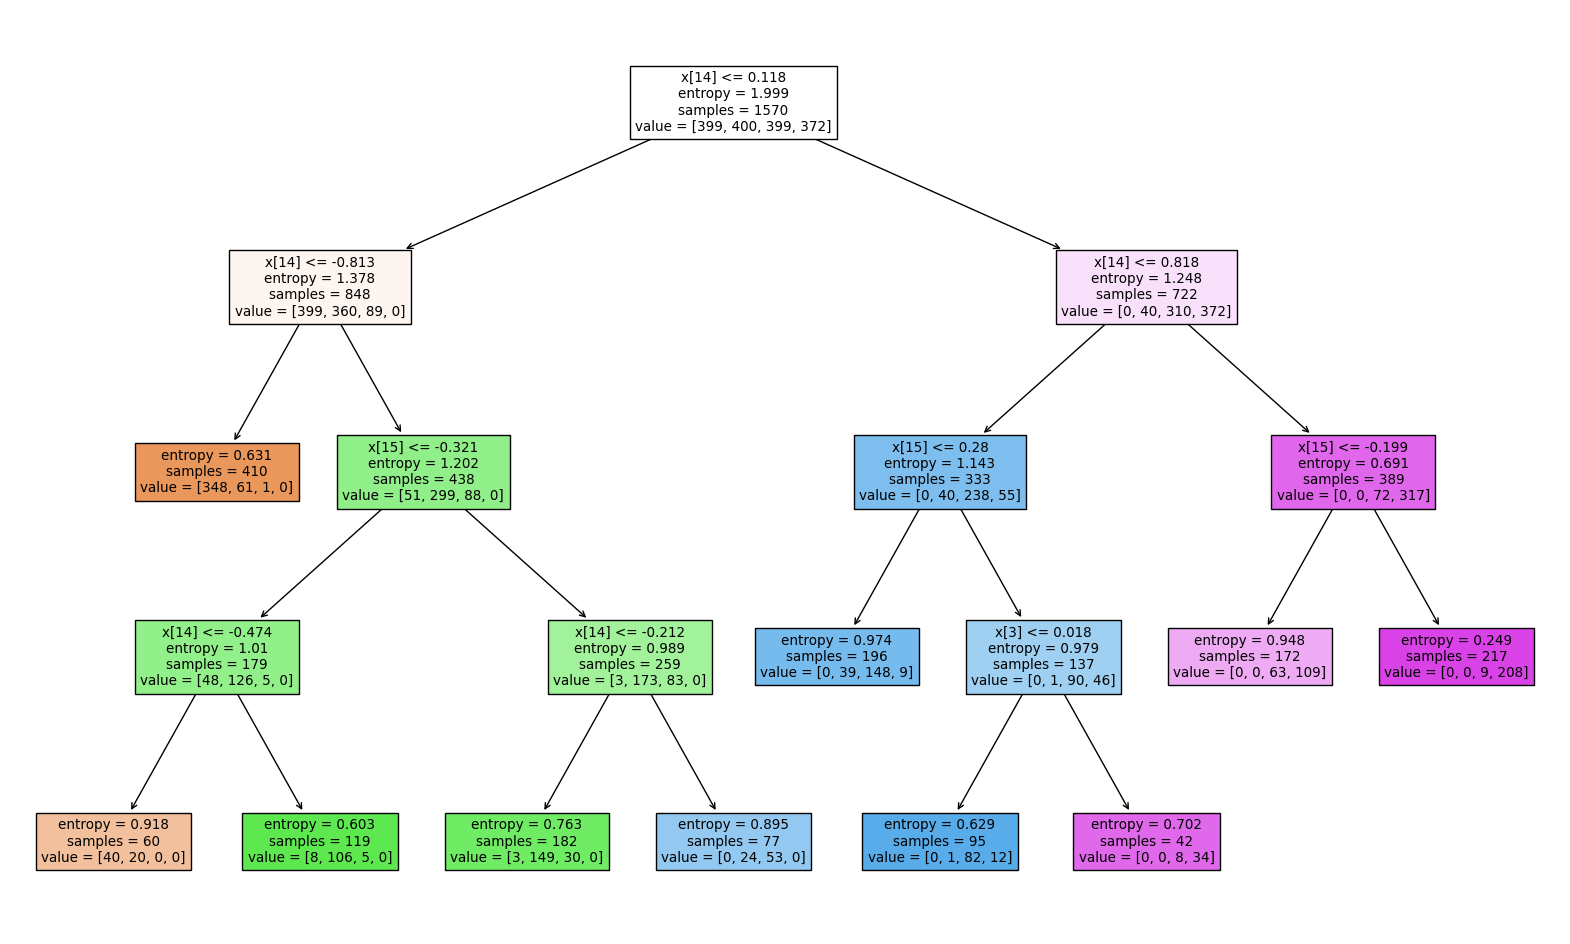

In [199]:
#Plot the decision tree
from sklearn import tree
plt.figure(figsize=(20,12))
tree.plot_tree(tree_classifier,filled=True)

#### 1.  Model performance using Evaluation metric Score.

In [200]:
# Evaluation Metric Score chart- Accuracy
accuracy_score(train_tree_pred,y_train)

0.813375796178344

In [201]:
accuracy_score(test_tree_pred,y_test)

0.7760814249363868

In [202]:
# Evaluation Metric Score chart- Confusion matrix
cm_train=confusion_matrix(train_tree_pred,y_train)
cm_train

array([[388,  81,   1,   0],
       [ 11, 255,  35,   0],
       [  0,  64, 283,  21],
       [  0,   0,  80, 351]])

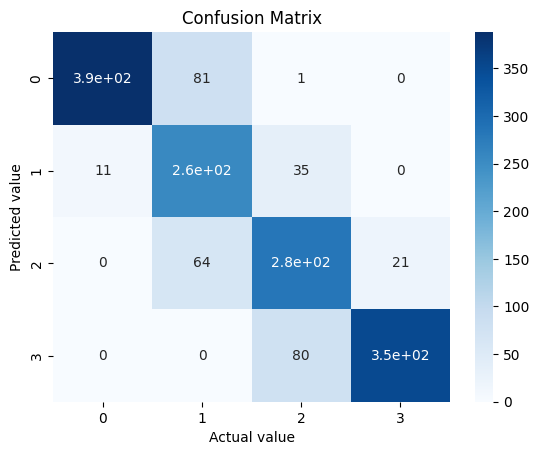

In [203]:
# Ploting the confusion matrix
ax=sns.heatmap(cm_train,annot=True,cmap='Blues')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Actual value')
ax.set_ylabel('Predicted value')
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])
plt.show()

In [204]:
cm_test=confusion_matrix(test_tree_pred,y_test)
cm_test

array([[ 92,  22,   0,   0],
       [  3,  43,  12,   0],
       [  0,  26,  58,   3],
       [  0,   0,  22, 112]])

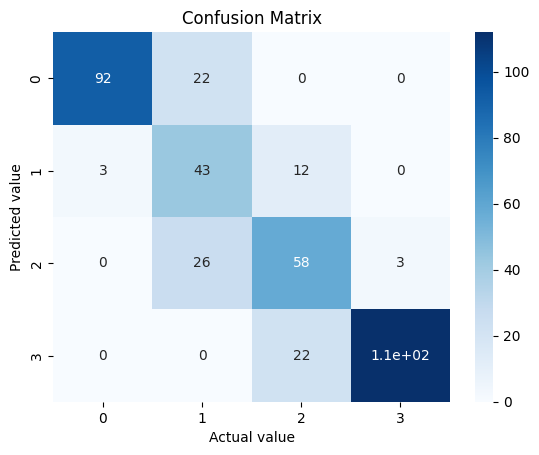

In [205]:
# Ploting the confusion matrix
ax=sns.heatmap(cm_test,annot=True,cmap='Blues')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Actual value')
ax.set_ylabel('Predicted value')
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])
plt.show()

In [206]:
# Evaluation Metric Score chart- classification report
print(classification_report(train_tree_pred,y_train))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89       470
           1       0.64      0.85      0.73       301
           2       0.71      0.77      0.74       368
           3       0.94      0.81      0.87       431

    accuracy                           0.81      1570
   macro avg       0.82      0.81      0.81      1570
weighted avg       0.84      0.81      0.82      1570



In [207]:
print(classification_report(test_tree_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88       114
           1       0.47      0.74      0.58        58
           2       0.63      0.67      0.65        87
           3       0.97      0.84      0.90       134

    accuracy                           0.78       393
   macro avg       0.76      0.76      0.75       393
weighted avg       0.82      0.78      0.79       393



#### 2. Cross- Validation & Hyperparameter Tuning

In [208]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
grid={'max_depth':[1,2,3,4,5,6,7,8,9,10,15,20],"min_samples_leaf":[1,2,3,4,5,10,15,20,40,60,80,100],"max_leaf_nodes":[10,20,30,40,50,70,100,140,150]}
class_model=DecisionTreeClassifier()
tree_classifier=GridSearchCV(class_model,param_grid=grid,cv=7)
# Fit the Algorithm
tree_classifier.fit(x_train,y_train)
# Predict on the model
train_tree_cv_pred=tree_classifier.predict(x_train)
test_tree_cv_pred=tree_classifier.predict(x_test)

In [209]:
# Best parameter
tree_classifier.best_params_

{'max_depth': 10, 'max_leaf_nodes': 50, 'min_samples_leaf': 5}

####3.Decision tree model with cross validation performance using Evaluation metric

In [210]:
# Evaluation Metric Score chart- Accuracy score
accuracy_score(train_tree_cv_pred,y_train)

0.935031847133758

In [211]:
accuracy_score(test_tree_cv_pred,y_test)

0.8651399491094147

In [212]:
# Evaluation Metric Score chart- Confusion matrix
confusion_matrix(train_tree_cv_pred,y_train)

array([[379,  14,   0,   0],
       [ 20, 369,  19,   0],
       [  0,  17, 362,  14],
       [  0,   0,  18, 358]])

In [213]:
cm_cv_test=confusion_matrix(test_tree_cv_pred,y_test)
cm_cv_test

array([[ 89,   4,   0,   0],
       [  6,  73,   9,   0],
       [  0,  14,  72,   9],
       [  0,   0,  11, 106]])

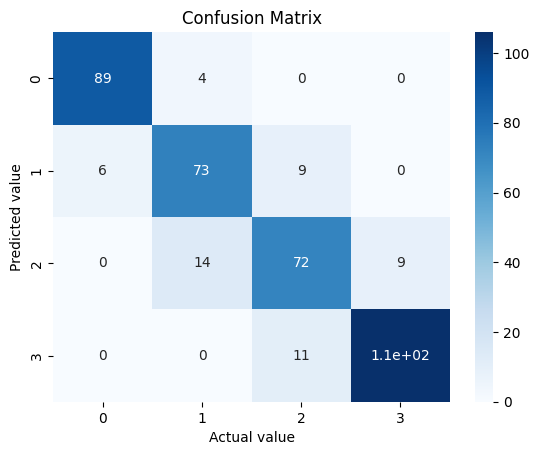

In [214]:
# Ploting the confusion matrix
ax=sns.heatmap(cm_cv_test,annot=True,cmap='Blues')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Actual value')
ax.set_ylabel('Predicted value')
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])
plt.show()

In [215]:
# Evaluation Metric Score chart- Classification report
print(classification_report(train_tree_cv_pred,y_train))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       393
           1       0.92      0.90      0.91       408
           2       0.91      0.92      0.91       393
           3       0.96      0.95      0.96       376

    accuracy                           0.94      1570
   macro avg       0.94      0.94      0.94      1570
weighted avg       0.94      0.94      0.94      1570



In [216]:
print(classification_report(test_tree_cv_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        93
           1       0.80      0.83      0.82        88
           2       0.78      0.76      0.77        95
           3       0.92      0.91      0.91       117

    accuracy                           0.87       393
   macro avg       0.86      0.86      0.86       393
weighted avg       0.86      0.87      0.86       393



##### Which hyperparameter optimization technique have you used and why?

I used the grid search cross validation and hyperparamer tunning to predict the better accuracy. Previously may have the overfiting the data.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Before Tuning training accuarcy = 79%, test accuarcy = 78%
Model is overfitted the data and does not generalised well. So we tuned the hyperparameters.
After tuning: Training accuarcy= 94%, Test accuarcy = 87.2%
we have slightly improved the model and overfitting is reduced slightly.

### Random Forest

In [217]:
# ML Model - 3 Implementation
from sklearn.ensemble import RandomForestClassifier
classification=RandomForestClassifier(random_state=0)
# Fit the Algorithm
classification.fit(x_train,y_train)
# Predict on the model
train_random_pred=classification.predict(x_train)
test_random_pred=classification.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [218]:
#  Evaluation Metric Score chart- Accuracy score
accuracy_score(train_random_pred,y_train)

1.0

In [219]:
accuracy_score(test_random_pred,y_test)

0.8854961832061069

In [220]:
#  Evaluation Metric Score chart- Confusion matrix
confusion_matrix(train_random_pred,y_train)

array([[399,   0,   0,   0],
       [  0, 400,   0,   0],
       [  0,   0, 399,   0],
       [  0,   0,   0, 372]])

In [221]:
cm_test=confusion_matrix(test_random_pred,y_test)
cm_test

array([[ 90,   6,   0,   0],
       [  5,  74,   9,   0],
       [  0,  11,  79,  10],
       [  0,   0,   4, 105]])

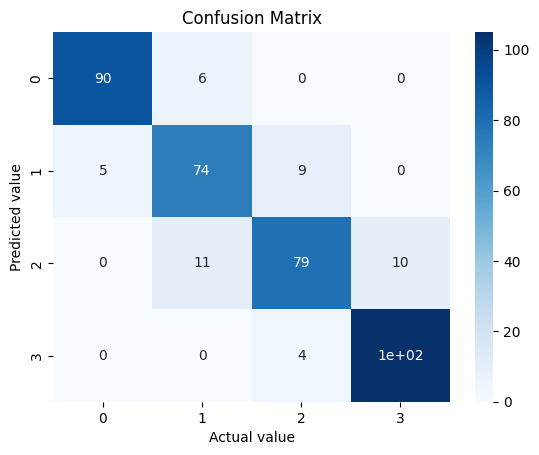

In [222]:
# Ploting the confusion matrix
ax=sns.heatmap(cm_test,annot=True,cmap='Blues')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Actual value')
ax.set_ylabel('Predicted value')
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])
plt.show()

In [223]:
#  Evaluation Metric Score chart- Clasification report
print(classification_report(train_random_pred,y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       399
           1       1.00      1.00      1.00       400
           2       1.00      1.00      1.00       399
           3       1.00      1.00      1.00       372

    accuracy                           1.00      1570
   macro avg       1.00      1.00      1.00      1570
weighted avg       1.00      1.00      1.00      1570



In [224]:
print(classification_report(test_random_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94        96
           1       0.81      0.84      0.83        88
           2       0.86      0.79      0.82       100
           3       0.91      0.96      0.94       109

    accuracy                           0.89       393
   macro avg       0.88      0.88      0.88       393
weighted avg       0.89      0.89      0.88       393



#### 2. Cross- Validation & Hyperparameter Tuning

In [225]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
grid_parameter={'criterion':['gini','entropy'],'n_estimators':[10,20,30,40,50],'max_depth':[3,5,7,10],
                'min_samples_split':[2,4,6],'max_leaf_nodes':[None],'max_features':['auto','log2','sqrt']}
rfc=RandomForestClassifier(random_state=0)
# Fit the Algorithm
rfc_grid=GridSearchCV(rfc,param_grid=grid_parameter,scoring='accuracy',cv=7,verbose=5)
rfc_grid.fit(x_train,y_train)
# Predict on the model
train_random_cv_pred=rfc_grid.predict(x_train)
test_random_cv_pred=rfc_grid.predict(x_test)

Fitting 7 folds for each of 360 candidates, totalling 2520 fits
[CV 1/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.787 total time=   0.0s
[CV 2/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.716 total time=   0.0s
[CV 3/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.683 total time=   0.0s
[CV 4/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.714 total time=   0.0s
[CV 5/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.705 total time=   0.0s
[CV 6/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.754 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 7/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.786 total time=   0.0s
[CV 1/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.756 total time=   0.1s
[CV 2/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.751 total time=   0.1s
[CV 3/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.768 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 4/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.737 total time=   0.1s
[CV 5/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.737 total time=   0.0s
[CV 6/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.790 total time=   0.1s
[CV 7/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.804 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 1/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=30;, score=0.773 total time=   0.1s
[CV 2/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=30;, score=0.764 total time=   0.1s
[CV 3/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=30;, score=0.772 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 4/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=30;, score=0.790 total time=   0.1s
[CV 5/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=30;, score=0.754 total time=   0.1s
[CV 6/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=30;, score=0.808 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 7/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=30;, score=0.830 total time=   0.1s
[CV 1/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=40;, score=0.787 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=40;, score=0.778 total time=   0.1s
[CV 3/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=40;, score=0.777 total time=   0.1s
[CV 4/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=40;, score=0.777 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 5/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=40;, score=0.772 total time=   0.1s
[CV 6/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=40;, score=0.817 total time=   0.1s
[CV 7/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=40;, score=0.835 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 1/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=50;, score=0.796 total time=   0.1s
[CV 2/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=50;, score=0.760 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=50;, score=0.781 total time=   0.1s
[CV 4/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=50;, score=0.786 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=50;, score=0.790 total time=   0.1s
[CV 6/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=50;, score=0.817 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=50;, score=0.830 total time=   0.1s
[CV 1/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=10;, score=0.787 total time=   0.0s
[CV 2/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=10;, score=0.716 total time=   0.0s
[CV 3/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=10;, score=0.683 total time=   0.0s
[CV 4/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=10;, score=0.714 total time=   0.0s
[CV 5/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=10;, score=0.723 total time=   0.0s
[CV 6/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_sa

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 7/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=10;, score=0.786 total time=   0.0s
[CV 1/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=20;, score=0.756 total time=   0.1s
[CV 2/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=20;, score=0.751 total time=   0.1s
[CV 3/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=20;, score=0.768 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 4/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=20;, score=0.737 total time=   0.1s
[CV 5/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=20;, score=0.746 total time=   0.1s
[CV 6/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=20;, score=0.790 total time=   0.0s
[CV 7/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=20;, score=0.804 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 1/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=30;, score=0.773 total time=   0.1s
[CV 2/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=30;, score=0.764 total time=   0.1s
[CV 3/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=30;, score=0.772 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 4/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=30;, score=0.790 total time=   0.1s
[CV 5/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=30;, score=0.768 total time=   0.1s
[CV 6/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=30;, score=0.808 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 7/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=30;, score=0.830 total time=   0.1s
[CV 1/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=40;, score=0.787 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 2/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=40;, score=0.778 total time=   0.1s
[CV 3/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=40;, score=0.777 total time=   0.1s
[CV 4/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=40;, score=0.777 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 5/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=40;, score=0.777 total time=   0.1s
[CV 6/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=40;, score=0.817 total time=   0.1s
[CV 7/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=40;, score=0.835 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=50;, score=0.796 total time=   0.1s
[CV 2/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=50;, score=0.760 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=50;, score=0.781 total time=   0.1s
[CV 4/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=50;, score=0.786 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=50;, score=0.795 total time=   0.1s
[CV 6/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=50;, score=0.817 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=50;, score=0.830 total time=   0.1s
[CV 1/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=10;, score=0.787 total time=   0.0s
[CV 2/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=10;, score=0.716 total time=   0.0s
[CV 3/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=10;, score=0.683 total time=   0.0s
[CV 4/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=10;, score=0.714 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 5/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=10;, score=0.723 total time=   0.1s
[CV 6/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=10;, score=0.754 total time=   0.0s
[CV 7/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=10;, score=0.786 total time=   0.0s
[CV 1/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=20;, score=0.756 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 2/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=20;, score=0.751 total time=   0.1s
[CV 3/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=20;, score=0.768 total time=   0.1s
[CV 4/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=20;, score=0.737 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 5/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=20;, score=0.746 total time=   0.1s
[CV 6/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=20;, score=0.790 total time=   0.1s
[CV 7/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=20;, score=0.804 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 1/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=30;, score=0.773 total time=   0.1s
[CV 2/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=30;, score=0.764 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=30;, score=0.772 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=30;, score=0.790 total time=   0.5s
[CV 5/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=30;, score=0.768 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=30;, score=0.808 total time=   0.1s
[CV 7/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=30;, score=0.830 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=40;, score=0.787 total time=   0.2s
[CV 2/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=40;, score=0.778 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=40;, score=0.777 total time=   0.2s
[CV 4/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=40;, score=0.777 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=40;, score=0.777 total time=   0.1s
[CV 6/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=40;, score=0.817 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=40;, score=0.835 total time=   0.1s
[CV 1/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=50;, score=0.796 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=50;, score=0.760 total time=   0.1s
[CV 3/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=50;, score=0.781 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=50;, score=0.786 total time=   0.1s
[CV 5/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=50;, score=0.795 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=50;, score=0.817 total time=   0.1s
[CV 7/7] END criterion=gini, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=50;, score=0.830 total time=   0.1s
[CV 1/7] END criterion=gini, max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.787 total time=   0.0s
[CV 2/7] END criterion=gini, max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.716 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/7] END criterion=gini, max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.683 total time=   0.0s
[CV 4/7] END criterion=gini, max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.714 total time=   0.0s
[CV 5/7] END criterion=gini, max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.705 total time=   0.0s
[CV 6/7] END criterion=gini, max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.754 total time=   0.0s
[CV 7/7] END criterion=gini, max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.786 total time=   0.0s
[CV 1/7] END criterion=gini, max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.756 total time=   0.0s
[CV 2/7] END criterion=gini, max_depth=3, max_features=log2, max_leaf_nodes=None, min_sa

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 7/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.799 total time=   0.0s
[CV 1/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.804 total time=   0.1s
[CV 2/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.804 total time=   0.1s
[CV 3/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.848 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 4/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.804 total time=   0.1s
[CV 5/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.786 total time=   0.1s
[CV 6/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.826 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 7/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.826 total time=   0.1s
[CV 1/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=30;, score=0.800 total time=   0.1s
[CV 2/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=30;, score=0.813 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 3/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=30;, score=0.835 total time=   0.1s
[CV 4/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=30;, score=0.826 total time=   0.1s
[CV 5/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=30;, score=0.826 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 6/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=30;, score=0.817 total time=   0.1s
[CV 7/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=30;, score=0.812 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=40;, score=0.813 total time=   0.1s
[CV 2/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=40;, score=0.804 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=40;, score=0.839 total time=   0.1s
[CV 4/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=40;, score=0.812 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=40;, score=0.830 total time=   0.1s
[CV 6/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=40;, score=0.830 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=40;, score=0.839 total time=   0.1s
[CV 1/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=50;, score=0.822 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=50;, score=0.809 total time=   0.1s
[CV 3/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=50;, score=0.830 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=50;, score=0.812 total time=   0.1s
[CV 5/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=50;, score=0.830 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=50;, score=0.857 total time=   0.1s
[CV 7/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=50;, score=0.835 total time=   0.1s
[CV 1/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=10;, score=0.804 total time=   0.0s
[CV 2/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=10;, score=0.764 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 3/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=10;, score=0.799 total time=   0.0s
[CV 4/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=10;, score=0.799 total time=   0.0s
[CV 5/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=10;, score=0.781 total time=   0.0s
[CV 6/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=10;, score=0.790 total time=   0.0s
[CV 7/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=10;, score=0.795 total time=   0.0s
[CV 1/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=20;, score=0.778 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 2/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=20;, score=0.800 total time=   0.1s
[CV 3/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=20;, score=0.821 total time=   0.1s
[CV 4/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=20;, score=0.808 total time=   0.1s
[CV 5/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=20;, score=0.795 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 6/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=20;, score=0.817 total time=   0.1s
[CV 7/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=20;, score=0.830 total time=   0.1s
[CV 1/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=30;, score=0.791 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 2/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=30;, score=0.809 total time=   0.1s
[CV 3/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=30;, score=0.835 total time=   0.1s
[CV 4/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=30;, score=0.808 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 5/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=30;, score=0.835 total time=   0.1s
[CV 6/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=30;, score=0.821 total time=   0.1s
[CV 7/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=30;, score=0.821 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 1/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=40;, score=0.809 total time=   0.1s
[CV 2/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=40;, score=0.800 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=40;, score=0.830 total time=   0.2s
[CV 4/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=40;, score=0.826 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=40;, score=0.830 total time=   0.2s
[CV 6/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=40;, score=0.844 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=40;, score=0.866 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=50;, score=0.809 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=50;, score=0.818 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=50;, score=0.830 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=50;, score=0.830 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=50;, score=0.830 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=50;, score=0.857 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=50;, score=0.857 total time=   0.2s
[CV 1/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=10;, score=0.804 total time=   0.1s
[CV 2/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=10;, score=0.782 total time=   0.0s
[CV 3/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=10;, score=0.808 total time=   0.0s
[CV 4/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=10;, score=0.808 total time=   0.0s
[CV 5/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=10;, score=0.786 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 6/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=10;, score=0.795 total time=   0.0s
[CV 7/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=10;, score=0.808 total time=   0.0s
[CV 1/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=20;, score=0.782 total time=   0.1s
[CV 2/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=20;, score=0.818 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 3/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=20;, score=0.844 total time=   0.1s
[CV 4/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=20;, score=0.808 total time=   0.1s
[CV 5/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=20;, score=0.799 total time=   0.1s
[CV 6/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=20;, score=0.812 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 7/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=20;, score=0.817 total time=   0.1s
[CV 1/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=30;, score=0.804 total time=   0.1s
[CV 2/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=30;, score=0.809 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 3/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=30;, score=0.839 total time=   0.1s
[CV 4/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=30;, score=0.826 total time=   0.1s
[CV 5/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=30;, score=0.830 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 6/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=30;, score=0.817 total time=   0.1s
[CV 7/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=30;, score=0.835 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=40;, score=0.804 total time=   0.1s
[CV 2/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=40;, score=0.809 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=40;, score=0.839 total time=   0.1s
[CV 4/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=40;, score=0.817 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=40;, score=0.826 total time=   0.1s
[CV 6/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=40;, score=0.848 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=40;, score=0.848 total time=   0.1s
[CV 1/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=50;, score=0.818 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=50;, score=0.804 total time=   0.2s
[CV 3/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=50;, score=0.857 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=50;, score=0.826 total time=   0.2s
[CV 5/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=50;, score=0.830 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=50;, score=0.839 total time=   0.1s
[CV 7/7] END criterion=gini, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=50;, score=0.844 total time=   0.1s
[CV 1/7] END criterion=gini, max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.813 total time=   0.0s
[CV 2/7] END criterion=gini, max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.778 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/7] END criterion=gini, max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.830 total time=   0.0s
[CV 4/7] END criterion=gini, max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.795 total time=   0.0s
[CV 5/7] END criterion=gini, max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.746 total time=   0.0s
[CV 6/7] END criterion=gini, max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.804 total time=   0.0s
[CV 7/7] END criterion=gini, max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.799 total time=   0.0s
[CV 1/7] END criterion=gini, max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.804 total time=   0.1s
[CV 2/7] END criterion=gini, max_depth=5, max_features=log2, max_leaf_nodes=None, min_sa

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 6/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.821 total time=   0.1s
[CV 7/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.839 total time=   0.1s
[CV 1/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.836 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 2/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.827 total time=   0.1s
[CV 3/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.862 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.817 total time=   0.1s
[CV 5/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.821 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.835 total time=   0.1s
[CV 7/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.866 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=30;, score=0.871 total time=   0.2s
[CV 2/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=30;, score=0.804 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=30;, score=0.862 total time=   0.2s
[CV 4/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=30;, score=0.817 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=30;, score=0.821 total time=   0.2s
[CV 6/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=30;, score=0.862 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=30;, score=0.862 total time=   0.2s
[CV 1/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=40;, score=0.844 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=40;, score=0.827 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=40;, score=0.862 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=40;, score=0.821 total time=   0.2s
[CV 5/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=40;, score=0.839 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=40;, score=0.848 total time=   0.1s
[CV 7/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=40;, score=0.871 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=50;, score=0.862 total time=   0.2s
[CV 2/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=50;, score=0.831 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=50;, score=0.875 total time=   0.2s
[CV 4/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=50;, score=0.835 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=50;, score=0.848 total time=   0.2s
[CV 6/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=50;, score=0.844 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=50;, score=0.857 total time=   0.2s
[CV 1/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=10;, score=0.813 total time=   0.0s
[CV 2/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=10;, score=0.804 total time=   0.0s
[CV 3/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=10;, score=0.826 total time=   0.0s
[CV 4/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=10;, score=0.781 total time=   0.0s
[CV 5/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=10;, score=0.795 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 6/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=10;, score=0.808 total time=   0.0s
[CV 7/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=10;, score=0.826 total time=   0.0s
[CV 1/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=20;, score=0.836 total time=   0.1s
[CV 2/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=20;, score=0.796 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 3/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=20;, score=0.848 total time=   0.1s
[CV 4/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=20;, score=0.848 total time=   0.1s
[CV 5/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=20;, score=0.839 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 6/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=20;, score=0.812 total time=   0.1s
[CV 7/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=20;, score=0.848 total time=   0.1s
[CV 1/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=30;, score=0.849 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 2/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=30;, score=0.818 total time=   0.1s
[CV 3/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=30;, score=0.844 total time=   0.1s
[CV 4/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=30;, score=0.839 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 5/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=30;, score=0.866 total time=   0.1s
[CV 6/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=30;, score=0.812 total time=   0.1s
[CV 7/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=30;, score=0.866 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 1/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=40;, score=0.840 total time=   0.2s
[CV 2/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=40;, score=0.818 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=40;, score=0.826 total time=   0.1s
[CV 4/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=40;, score=0.835 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=40;, score=0.857 total time=   0.1s
[CV 6/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=40;, score=0.848 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=40;, score=0.866 total time=   0.1s
[CV 1/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=50;, score=0.840 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=50;, score=0.809 total time=   0.2s
[CV 3/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=50;, score=0.830 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=50;, score=0.830 total time=   0.2s
[CV 5/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=50;, score=0.879 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=50;, score=0.844 total time=   0.2s
[CV 7/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=50;, score=0.875 total time=   0.2s
[CV 1/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=10;, score=0.840 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 2/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=10;, score=0.778 total time=   0.0s
[CV 3/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=10;, score=0.830 total time=   0.0s
[CV 4/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=10;, score=0.830 total time=   0.0s
[CV 5/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=10;, score=0.808 total time=   0.0s
[CV 6/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=10;, score=0.826 total time=   0.0s
[CV 7/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=10;, score=0.817 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 1/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=20;, score=0.831 total time=   0.1s
[CV 2/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=20;, score=0.822 total time=   0.1s
[CV 3/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=20;, score=0.848 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 4/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=20;, score=0.830 total time=   0.1s
[CV 5/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=20;, score=0.808 total time=   0.1s
[CV 6/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=20;, score=0.839 total time=   0.1s
[CV 7/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=20;, score=0.835 total time=   0.1s

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest


[CV 1/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=30;, score=0.844 total time=   0.1s
[CV 2/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=30;, score=0.827 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 3/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=30;, score=0.857 total time=   0.1s
[CV 4/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=30;, score=0.826 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 5/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=30;, score=0.826 total time=   0.1s
[CV 6/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=30;, score=0.839 total time=   0.1s
[CV 7/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=30;, score=0.844 total time=   0.1s
[CV 1/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=40;, score=0.836 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=40;, score=0.827 total time=   0.1s
[CV 3/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=40;, score=0.862 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=40;, score=0.821 total time=   0.1s
[CV 5/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=40;, score=0.835 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=40;, score=0.857 total time=   0.1s
[CV 7/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=40;, score=0.853 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=50;, score=0.858 total time=   0.2s
[CV 2/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=50;, score=0.827 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=50;, score=0.862 total time=   0.2s
[CV 4/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=50;, score=0.817 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=50;, score=0.871 total time=   0.2s
[CV 6/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=50;, score=0.835 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/7] END criterion=gini, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=50;, score=0.857 total time=   0.2s
[CV 1/7] END criterion=gini, max_depth=7, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.773 total time=   0.0s
[CV 2/7] END criterion=gini, max_depth=7, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.831 total time=   0.0s
[CV 3/7] END criterion=gini, max_depth=7, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.835 total time=   0.0s
[CV 4/7] END criterion=gini, max_depth=7, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.790 total time=   0.0s
[CV 5/7] END criterion=gini, max_depth=7, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.799 total time=   0.0s
[CV 6/7] END criterion=gini, max_depth=7, max_features=log2, max_leaf_nodes=None, min_sa

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 5/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.830 total time=   0.0s
[CV 6/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.786 total time=   0.1s
[CV 7/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.853 total time=   0.0s
[CV 1/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.862 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 2/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.831 total time=   0.1s
[CV 3/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.888 total time=   0.1s
[CV 4/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.812 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 5/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.826 total time=   0.1s
[CV 6/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.830 total time=   0.1s
[CV 7/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.853 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=30;, score=0.871 total time=   0.1s
[CV 2/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=30;, score=0.840 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=30;, score=0.888 total time=   0.1s
[CV 4/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=30;, score=0.812 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=30;, score=0.888 total time=   0.1s
[CV 6/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=30;, score=0.839 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=30;, score=0.862 total time=   0.1s
[CV 1/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=40;, score=0.871 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=40;, score=0.840 total time=   0.2s
[CV 3/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=40;, score=0.884 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=40;, score=0.812 total time=   0.2s
[CV 5/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=40;, score=0.879 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=40;, score=0.853 total time=   0.1s
[CV 7/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=40;, score=0.871 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=50;, score=0.876 total time=   0.2s
[CV 2/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=50;, score=0.827 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=50;, score=0.888 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=50;, score=0.817 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=50;, score=0.875 total time=   0.3s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=50;, score=0.853 total time=   0.3s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=50;, score=0.862 total time=   0.3s
[CV 1/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=10;, score=0.813 total time=   0.1s
[CV 2/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=10;, score=0.836 total time=   0.1s
[CV 3/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=10;, score=0.839 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 4/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=10;, score=0.817 total time=   0.1s
[CV 5/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=10;, score=0.808 total time=   0.1s
[CV 6/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=10;, score=0.844 total time=   0.1s
[CV 7/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=10;, score=0.826 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 1/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=20;, score=0.849 total time=   0.1s
[CV 2/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=20;, score=0.853 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=20;, score=0.853 total time=   0.1s
[CV 4/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=20;, score=0.817 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=20;, score=0.839 total time=   0.1s
[CV 6/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=20;, score=0.848 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=20;, score=0.835 total time=   0.1s
[CV 1/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=30;, score=0.836 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=30;, score=0.836 total time=   0.2s
[CV 3/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=30;, score=0.848 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=30;, score=0.812 total time=   0.1s
[CV 5/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=30;, score=0.857 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=30;, score=0.839 total time=   0.1s
[CV 7/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=30;, score=0.848 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=40;, score=0.862 total time=   0.2s
[CV 2/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=40;, score=0.840 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=40;, score=0.857 total time=   0.2s
[CV 4/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=40;, score=0.830 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=40;, score=0.871 total time=   0.2s
[CV 6/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=40;, score=0.844 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=40;, score=0.862 total time=   0.2s
[CV 1/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=50;, score=0.849 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=50;, score=0.844 total time=   0.2s
[CV 3/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=50;, score=0.857 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=50;, score=0.844 total time=   0.2s
[CV 5/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=50;, score=0.866 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=50;, score=0.866 total time=   0.2s
[CV 7/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=50;, score=0.866 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=10;, score=0.844 total time=   0.1s
[CV 2/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=10;, score=0.822 total time=   0.0s
[CV 3/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=10;, score=0.808 total time=   0.0s
[CV 4/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=10;, score=0.799 total time=   0.0s
[CV 5/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=10;, score=0.812 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 6/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=10;, score=0.830 total time=   0.1s
[CV 7/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=10;, score=0.826 total time=   0.0s
[CV 1/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=20;, score=0.853 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 2/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=20;, score=0.831 total time=   0.1s
[CV 3/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=20;, score=0.844 total time=   0.1s
[CV 4/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=20;, score=0.821 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 5/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=20;, score=0.835 total time=   0.1s
[CV 6/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=20;, score=0.839 total time=   0.1s
[CV 7/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=20;, score=0.839 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 1/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=30;, score=0.867 total time=   0.1s
[CV 2/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=30;, score=0.853 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=30;, score=0.866 total time=   0.1s
[CV 4/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=30;, score=0.835 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=30;, score=0.884 total time=   0.1s
[CV 6/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=30;, score=0.871 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=30;, score=0.871 total time=   0.1s
[CV 1/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=40;, score=0.867 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=40;, score=0.836 total time=   0.2s
[CV 3/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=40;, score=0.857 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=40;, score=0.830 total time=   0.2s
[CV 5/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=40;, score=0.866 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=40;, score=0.857 total time=   0.2s
[CV 7/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=40;, score=0.853 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=50;, score=0.862 total time=   0.2s
[CV 2/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=50;, score=0.831 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=50;, score=0.853 total time=   0.2s
[CV 4/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=50;, score=0.844 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=50;, score=0.866 total time=   0.2s
[CV 6/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=50;, score=0.853 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/7] END criterion=gini, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=50;, score=0.875 total time=   0.2s
[CV 1/7] END criterion=gini, max_depth=10, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.822 total time=   0.0s
[CV 2/7] END criterion=gini, max_depth=10, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.800 total time=   0.0s
[CV 3/7] END criterion=gini, max_depth=10, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.902 total time=   0.0s
[CV 4/7] END criterion=gini, max_depth=10, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.786 total time=   0.0s
[CV 5/7] END criterion=gini, max_depth=10, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.830 total time=   0.0s
[CV 6/7] END criterion=gini, max_depth=10, max_features=log2, max_leaf_nodes=None,

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 1/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.742 total time=   0.0s
[CV 2/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.707 total time=   0.0s
[CV 3/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.621 total time=   0.0s
[CV 4/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.629 total time=   0.0s
[CV 5/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.652 total time=   0.0s
[CV 6/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.683 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 7/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.705 total time=   0.0s
[CV 1/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.729 total time=   0.1s
[CV 2/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.747 total time=   0.1s
[CV 3/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.692 total time=   0.1s
[CV 4/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.647 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 5/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.652 total time=   0.1s
[CV 6/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.714 total time=   0.1s
[CV 7/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.692 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 1/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=30;, score=0.751 total time=   0.1s
[CV 2/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=30;, score=0.769 total time=   0.1s
[CV 3/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=30;, score=0.746 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 4/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=30;, score=0.696 total time=   0.1s
[CV 5/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=30;, score=0.732 total time=   0.1s
[CV 6/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=30;, score=0.750 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 7/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=30;, score=0.750 total time=   0.1s
[CV 1/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=40;, score=0.782 total time=   0.1s
[CV 2/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=40;, score=0.756 total time=   0.1s
[CV 3/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=40;, score=0.777 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=40;, score=0.754 total time=   0.1s
[CV 5/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=40;, score=0.741 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=40;, score=0.786 total time=   0.1s
[CV 7/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=40;, score=0.759 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=50;, score=0.756 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=50;, score=0.747 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=50;, score=0.768 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=50;, score=0.750 total time=   0.3s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=50;, score=0.750 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=50;, score=0.786 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=50;, score=0.772 total time=   0.2s
[CV 1/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=10;, score=0.742 total time=   0.0s
[CV 2/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=10;, score=0.707 total time=   0.0s
[CV 3/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=10;, score=0.621 total time=   0.1s
[CV 4/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=10;, score=0.629 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 5/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=10;, score=0.652 total time=   0.1s
[CV 6/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=10;, score=0.683 total time=   0.1s
[CV 7/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=10;, score=0.705 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 1/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=20;, score=0.729 total time=   0.1s
[CV 2/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=20;, score=0.747 total time=   0.1s
[CV 3/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=20;, score=0.692 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 4/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=20;, score=0.647 total time=   0.1s
[CV 5/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=20;, score=0.652 total time=   0.1s
[CV 6/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=20;, score=0.714 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 7/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=20;, score=0.692 total time=   0.1s
[CV 1/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=30;, score=0.751 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=30;, score=0.769 total time=   0.2s
[CV 3/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=30;, score=0.746 total time=   0.1s
[CV 4/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=30;, score=0.696 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 5/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=30;, score=0.732 total time=   0.1s
[CV 6/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=30;, score=0.750 total time=   0.1s
[CV 7/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=30;, score=0.750 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 1/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=40;, score=0.782 total time=   0.1s
[CV 2/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=40;, score=0.756 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=40;, score=0.777 total time=   0.1s
[CV 4/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=40;, score=0.754 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=40;, score=0.741 total time=   0.1s
[CV 6/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=40;, score=0.786 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=40;, score=0.759 total time=   0.1s
[CV 1/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=50;, score=0.756 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=50;, score=0.747 total time=   0.1s
[CV 3/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=50;, score=0.768 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=50;, score=0.750 total time=   0.1s
[CV 5/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=50;, score=0.750 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=50;, score=0.786 total time=   0.1s
[CV 7/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=50;, score=0.772 total time=   0.1s
[CV 1/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=10;, score=0.742 total time=   0.0s
[CV 2/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=10;, score=0.707 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 3/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=10;, score=0.621 total time=   0.0s
[CV 4/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=10;, score=0.629 total time=   0.0s
[CV 5/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=10;, score=0.652 total time=   0.0s
[CV 6/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=10;, score=0.683 total time=   0.0s
[CV 7/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=10;, score=0.705 total time=   0.0s
[CV 1/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=20;, score=0.733 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 2/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=20;, score=0.747 total time=   0.1s
[CV 3/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=20;, score=0.692 total time=   0.1s
[CV 4/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=20;, score=0.647 total time=   0.1s
[CV 5/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=20;, score=0.652 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 6/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=20;, score=0.714 total time=   0.1s
[CV 7/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=20;, score=0.692 total time=   0.1s
[CV 1/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=30;, score=0.756 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 2/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=30;, score=0.769 total time=   0.1s
[CV 3/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=30;, score=0.746 total time=   0.1s
[CV 4/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=30;, score=0.696 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 5/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=30;, score=0.732 total time=   0.1s
[CV 6/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=30;, score=0.750 total time=   0.1s
[CV 7/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=30;, score=0.750 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 1/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=40;, score=0.787 total time=   0.1s
[CV 2/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=40;, score=0.756 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=40;, score=0.777 total time=   0.1s
[CV 4/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=40;, score=0.754 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=40;, score=0.741 total time=   0.1s
[CV 6/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=40;, score=0.786 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=40;, score=0.759 total time=   0.1s
[CV 1/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=50;, score=0.756 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=50;, score=0.747 total time=   0.1s
[CV 3/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=50;, score=0.768 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=50;, score=0.750 total time=   0.1s
[CV 5/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=50;, score=0.750 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=50;, score=0.786 total time=   0.2s
[CV 7/7] END criterion=entropy, max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=50;, score=0.772 total time=   0.1s
[CV 1/7] END criterion=entropy, max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.742 total time=   0.0s
[CV 2/7] END criterion=entropy, max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.707 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/7] END criterion=entropy, max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.621 total time=   0.0s
[CV 4/7] END criterion=entropy, max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.629 total time=   0.0s
[CV 5/7] END criterion=entropy, max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.652 total time=   0.0s
[CV 6/7] END criterion=entropy, max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.683 total time=   0.0s
[CV 7/7] END criterion=entropy, max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.705 total time=   0.0s
[CV 1/7] END criterion=entropy, max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.729 total time=   0.1s
[CV 2/7] END criterion=entropy, max_depth=3, max_features=log2, max_le

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 4/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.781 total time=   0.1s
[CV 5/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.772 total time=   0.1s
[CV 6/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.808 total time=   0.1s
[CV 7/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.830 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 1/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.818 total time=   0.1s
[CV 2/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.778 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.817 total time=   0.1s
[CV 4/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.768 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.790 total time=   0.1s
[CV 6/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.866 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.857 total time=   0.1s
[CV 1/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=30;, score=0.822 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=30;, score=0.782 total time=   0.1s
[CV 3/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=30;, score=0.817 total time=   0.1s
[CV 4/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=30;, score=0.821 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 5/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=30;, score=0.799 total time=   0.1s
[CV 6/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=30;, score=0.866 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=30;, score=0.848 total time=   0.1s
[CV 1/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=40;, score=0.836 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=40;, score=0.804 total time=   0.1s
[CV 3/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=40;, score=0.844 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=40;, score=0.817 total time=   0.1s
[CV 5/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=40;, score=0.808 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=40;, score=0.871 total time=   0.1s
[CV 7/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=40;, score=0.839 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=50;, score=0.822 total time=   0.2s
[CV 2/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=50;, score=0.804 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=50;, score=0.853 total time=   0.2s
[CV 4/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=50;, score=0.808 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=50;, score=0.808 total time=   0.2s
[CV 6/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=50;, score=0.879 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=50;, score=0.844 total time=   0.2s
[CV 1/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=10;, score=0.804 total time=   0.0s
[CV 2/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=10;, score=0.782 total time=   0.0s
[CV 3/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=10;, score=0.826 total time=   0.0s
[CV 4/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=10;, score=0.786 total time=   0.0s
[CV 5/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=10;, score=0.786 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 6/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=10;, score=0.808 total time=   0.1s
[CV 7/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=10;, score=0.830 total time=   0.0s
[CV 1/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=20;, score=0.813 total time=   0.1s
[CV 2/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=20;, score=0.778 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 3/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=20;, score=0.812 total time=   0.1s
[CV 4/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=20;, score=0.768 total time=   0.1s
[CV 5/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=20;, score=0.795 total time=   0.1s
[CV 6/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=20;, score=0.853 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 7/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=20;, score=0.857 total time=   0.1s
[CV 1/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=30;, score=0.827 total time=   0.1s
[CV 2/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=30;, score=0.809 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 3/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=30;, score=0.826 total time=   0.1s
[CV 4/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=30;, score=0.812 total time=   0.1s
[CV 5/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=30;, score=0.808 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 6/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=30;, score=0.866 total time=   0.1s
[CV 7/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=30;, score=0.853 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=40;, score=0.831 total time=   0.1s
[CV 2/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=40;, score=0.818 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=40;, score=0.826 total time=   0.1s
[CV 4/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=40;, score=0.799 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=40;, score=0.812 total time=   0.1s
[CV 6/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=40;, score=0.871 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=40;, score=0.853 total time=   0.2s
[CV 1/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=50;, score=0.827 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=50;, score=0.804 total time=   0.2s
[CV 3/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=50;, score=0.839 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=50;, score=0.808 total time=   0.2s
[CV 5/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=50;, score=0.804 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=50;, score=0.884 total time=   0.2s
[CV 7/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=50;, score=0.848 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=10;, score=0.818 total time=   0.0s
[CV 2/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=10;, score=0.778 total time=   0.0s
[CV 3/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=10;, score=0.821 total time=   0.0s
[CV 4/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=10;, score=0.768 total time=   0.0s
[CV 5/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=10;, score=0.768 total time=   0.0s
[CV 6/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=10;, score=0.808 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 7/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=10;, score=0.835 total time=   0.1s
[CV 1/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=20;, score=0.804 total time=   0.1s
[CV 2/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=20;, score=0.791 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 3/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=20;, score=0.817 total time=   0.1s
[CV 4/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=20;, score=0.772 total time=   0.1s
[CV 5/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=20;, score=0.790 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 6/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=20;, score=0.857 total time=   0.1s
[CV 7/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=20;, score=0.853 total time=   0.1s
[CV 1/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=30;, score=0.818 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 2/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=30;, score=0.791 total time=   0.1s
[CV 3/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=30;, score=0.821 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=30;, score=0.804 total time=   0.1s
[CV 5/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=30;, score=0.808 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=30;, score=0.857 total time=   0.1s
[CV 7/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=30;, score=0.853 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=40;, score=0.840 total time=   0.1s
[CV 2/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=40;, score=0.809 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=40;, score=0.835 total time=   0.1s
[CV 4/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=40;, score=0.799 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=40;, score=0.808 total time=   0.1s
[CV 6/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=40;, score=0.875 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=40;, score=0.857 total time=   0.1s
[CV 1/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=50;, score=0.836 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=50;, score=0.813 total time=   0.2s
[CV 3/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=50;, score=0.835 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=50;, score=0.812 total time=   0.2s
[CV 5/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=50;, score=0.795 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=50;, score=0.884 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/7] END criterion=entropy, max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=50;, score=0.848 total time=   0.3s
[CV 1/7] END criterion=entropy, max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.796 total time=   0.1s
[CV 2/7] END criterion=entropy, max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.782 total time=   0.1s
[CV 3/7] END criterion=entropy, max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.821 total time=   0.1s
[CV 4/7] END criterion=entropy, max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.781 total time=   0.1s
[CV 5/7] END criterion=entropy, max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.772 total time=   0.1s
[CV 6/7] END criterion=entropy, max_depth=5, max_features=log2, max_le

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 5/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.786 total time=   0.0s
[CV 6/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.812 total time=   0.1s
[CV 7/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.839 total time=   0.0s
[CV 1/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.853 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 2/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.813 total time=   0.1s
[CV 3/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.844 total time=   0.1s
[CV 4/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.821 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 5/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.812 total time=   0.1s
[CV 6/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.839 total time=   0.1s
[CV 7/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.835 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 1/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=30;, score=0.862 total time=   0.1s
[CV 2/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=30;, score=0.804 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=30;, score=0.830 total time=   0.1s
[CV 4/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=30;, score=0.799 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=30;, score=0.826 total time=   0.1s
[CV 6/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=30;, score=0.844 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=30;, score=0.830 total time=   0.1s
[CV 1/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=40;, score=0.853 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=40;, score=0.827 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=40;, score=0.835 total time=   0.3s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=40;, score=0.804 total time=   0.3s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=40;, score=0.835 total time=   0.3s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=40;, score=0.862 total time=   0.3s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=40;, score=0.862 total time=   0.3s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=50;, score=0.862 total time=   0.3s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=50;, score=0.822 total time=   0.3s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=50;, score=0.853 total time=   0.4s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=50;, score=0.817 total time=   0.3s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=50;, score=0.839 total time=   0.2s
[CV 6/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=50;, score=0.857 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=50;, score=0.857 total time=   0.2s
[CV 1/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=10;, score=0.840 total time=   0.0s
[CV 2/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=10;, score=0.764 total time=   0.0s
[CV 3/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=10;, score=0.812 total time=   0.0s
[CV 4/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=10;, score=0.826 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 5/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=10;, score=0.817 total time=   0.1s
[CV 6/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=10;, score=0.795 total time=   0.0s
[CV 7/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=10;, score=0.848 total time=   0.0s
[CV 1/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=20;, score=0.853 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 2/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=20;, score=0.809 total time=   0.1s
[CV 3/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=20;, score=0.848 total time=   0.1s
[CV 4/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=20;, score=0.839 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 5/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=20;, score=0.848 total time=   0.1s
[CV 6/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=20;, score=0.835 total time=   0.1s
[CV 7/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=20;, score=0.839 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 1/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=30;, score=0.858 total time=   0.1s
[CV 2/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=30;, score=0.809 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=30;, score=0.844 total time=   0.1s
[CV 4/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=30;, score=0.830 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=30;, score=0.853 total time=   0.1s
[CV 6/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=30;, score=0.862 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=30;, score=0.866 total time=   0.1s
[CV 1/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=40;, score=0.849 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=40;, score=0.800 total time=   0.2s
[CV 3/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=40;, score=0.844 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=40;, score=0.830 total time=   0.2s
[CV 5/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=40;, score=0.857 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=40;, score=0.844 total time=   0.2s
[CV 7/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=40;, score=0.884 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=50;, score=0.849 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=50;, score=0.813 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=50;, score=0.853 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=50;, score=0.817 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=50;, score=0.857 total time=   0.2s
[CV 6/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=50;, score=0.857 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=50;, score=0.884 total time=   0.2s
[CV 1/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=10;, score=0.813 total time=   0.0s
[CV 2/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=10;, score=0.782 total time=   0.0s
[CV 3/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=10;, score=0.821 total time=   0.0s
[CV 4/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=10;, score=0.799 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 5/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=10;, score=0.786 total time=   0.1s
[CV 6/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=10;, score=0.853 total time=   0.0s
[CV 7/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=10;, score=0.853 total time=   0.0s
[CV 1/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=20;, score=0.800 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 2/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=20;, score=0.822 total time=   0.1s
[CV 3/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=20;, score=0.839 total time=   0.1s
[CV 4/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=20;, score=0.821 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 5/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=20;, score=0.817 total time=   0.1s
[CV 6/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=20;, score=0.853 total time=   0.1s
[CV 7/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=20;, score=0.875 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 1/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=30;, score=0.800 total time=   0.1s
[CV 2/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=30;, score=0.827 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=30;, score=0.848 total time=   0.1s
[CV 4/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=30;, score=0.835 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=30;, score=0.844 total time=   0.1s
[CV 6/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=30;, score=0.871 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=30;, score=0.875 total time=   0.2s
[CV 1/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=40;, score=0.813 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=40;, score=0.827 total time=   0.2s
[CV 3/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=40;, score=0.862 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=40;, score=0.830 total time=   0.2s
[CV 5/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=40;, score=0.839 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=40;, score=0.884 total time=   0.2s
[CV 7/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=40;, score=0.871 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=50;, score=0.813 total time=   0.2s
[CV 2/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=50;, score=0.822 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=50;, score=0.862 total time=   0.2s
[CV 4/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=50;, score=0.826 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=50;, score=0.835 total time=   0.2s
[CV 6/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=50;, score=0.879 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/7] END criterion=entropy, max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=50;, score=0.875 total time=   0.2s
[CV 1/7] END criterion=entropy, max_depth=7, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.827 total time=   0.0s
[CV 2/7] END criterion=entropy, max_depth=7, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.764 total time=   0.0s
[CV 3/7] END criterion=entropy, max_depth=7, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.826 total time=   0.0s
[CV 4/7] END criterion=entropy, max_depth=7, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.790 total time=   0.0s
[CV 5/7] END criterion=entropy, max_depth=7, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.786 total time=   0.0s
[CV 6/7] END criterion=entropy, max_depth=7, max_features=log2, max_le

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 3/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.835 total time=   0.1s
[CV 4/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.821 total time=   0.1s
[CV 5/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.826 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 6/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.839 total time=   0.1s
[CV 7/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.844 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.836 total time=   0.2s
[CV 2/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.827 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.857 total time=   0.2s
[CV 4/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.857 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.857 total time=   0.1s
[CV 6/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.853 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 7/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=20;, score=0.862 total time=   0.1s
[CV 1/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=30;, score=0.862 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=30;, score=0.853 total time=   0.1s
[CV 3/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=30;, score=0.875 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=30;, score=0.848 total time=   0.1s
[CV 5/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=30;, score=0.839 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=30;, score=0.875 total time=   0.1s
[CV 7/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=30;, score=0.857 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=40;, score=0.840 total time=   0.2s
[CV 2/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=40;, score=0.858 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=40;, score=0.879 total time=   0.2s
[CV 4/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=40;, score=0.839 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=40;, score=0.844 total time=   0.2s
[CV 6/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=40;, score=0.875 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=40;, score=0.866 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=50;, score=0.867 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=50;, score=0.853 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=50;, score=0.871 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=50;, score=0.844 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=50;, score=0.848 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=50;, score=0.875 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=2, n_estimators=50;, score=0.875 total time=   0.2s
[CV 1/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=10;, score=0.844 total time=   0.1s
[CV 2/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=10;, score=0.822 total time=   0.0s
[CV 3/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=10;, score=0.826 total time=   0.0s
[CV 4/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=10;, score=0.835 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 5/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=10;, score=0.821 total time=   0.1s
[CV 6/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=10;, score=0.835 total time=   0.0s
[CV 7/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=10;, score=0.871 total time=   0.0s
[CV 1/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=20;, score=0.871 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 2/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=20;, score=0.796 total time=   0.1s
[CV 3/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=20;, score=0.866 total time=   0.1s
[CV 4/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=20;, score=0.848 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 5/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=20;, score=0.875 total time=   0.1s
[CV 6/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=20;, score=0.879 total time=   0.1s
[CV 7/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=20;, score=0.871 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 1/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=30;, score=0.862 total time=   0.2s
[CV 2/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=30;, score=0.827 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=30;, score=0.857 total time=   0.2s
[CV 4/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=30;, score=0.853 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=30;, score=0.888 total time=   0.2s
[CV 6/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=30;, score=0.862 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=30;, score=0.848 total time=   0.2s
[CV 1/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=40;, score=0.862 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=40;, score=0.822 total time=   0.2s
[CV 3/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=40;, score=0.862 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=40;, score=0.866 total time=   0.2s
[CV 5/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=40;, score=0.893 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=40;, score=0.866 total time=   0.2s
[CV 7/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=40;, score=0.879 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=50;, score=0.871 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=50;, score=0.822 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=50;, score=0.871 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=50;, score=0.875 total time=   0.3s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=50;, score=0.875 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=50;, score=0.888 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=4, n_estimators=50;, score=0.857 total time=   0.2s
[CV 1/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=10;, score=0.813 total time=   0.1s
[CV 2/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=10;, score=0.800 total time=   0.0s
[CV 3/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=10;, score=0.839 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 4/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=10;, score=0.821 total time=   0.1s
[CV 5/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=10;, score=0.839 total time=   0.1s
[CV 6/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=10;, score=0.795 total time=   0.0s
[CV 7/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=10;, score=0.844 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[CV 1/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=20;, score=0.818 total time=   0.1s
[CV 2/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=20;, score=0.836 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=20;, score=0.888 total time=   0.2s
[CV 4/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=20;, score=0.821 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=20;, score=0.875 total time=   0.1s
[CV 6/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=20;, score=0.866 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=20;, score=0.844 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=30;, score=0.849 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=30;, score=0.836 total time=   0.2s
[CV 3/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=30;, score=0.884 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=30;, score=0.839 total time=   0.3s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=30;, score=0.871 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=30;, score=0.844 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=30;, score=0.848 total time=   0.3s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=40;, score=0.836 total time=   0.3s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=40;, score=0.844 total time=   0.3s
[CV 3/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=40;, score=0.875 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=40;, score=0.839 total time=   0.2s
[CV 5/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=40;, score=0.871 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=40;, score=0.857 total time=   0.2s
[CV 7/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=40;, score=0.857 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=50;, score=0.844 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=50;, score=0.844 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=50;, score=0.875 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=50;, score=0.853 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=50;, score=0.871 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 6/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=50;, score=0.866 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 7/7] END criterion=entropy, max_depth=10, max_features=auto, max_leaf_nodes=None, min_samples_split=6, n_estimators=50;, score=0.853 total time=   0.3s
[CV 1/7] END criterion=entropy, max_depth=10, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.822 total time=   0.0s
[CV 2/7] END criterion=entropy, max_depth=10, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.818 total time=   0.0s
[CV 3/7] END criterion=entropy, max_depth=10, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.835 total time=   0.0s
[CV 4/7] END criterion=entropy, max_depth=10, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.821 total time=   0.0s
[CV 5/7] END criterion=entropy, max_depth=10, max_features=log2, max_leaf_nodes=None, min_samples_split=2, n_estimators=10;, score=0.826 total time=   0.1s
[CV 6/7] END criterion=entropy, max_depth=10, max_features=log2,

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


####3.Random forest model with cross validation performance using Evaluation metric

In [226]:
# Best parameter
rfc_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_split': 4,
 'n_estimators': 50}

In [227]:
#  Evaluation Metric Score chart- Accuracy score
accuracy_score(train_random_cv_pred,y_train)

0.9968152866242038

In [228]:
accuracy_score(test_random_cv_pred,y_test)

0.8931297709923665

In [229]:
#  Evaluation Metric Score chart- Confusion matrix
confusion_matrix(train_random_cv_pred,y_train)

array([[399,   0,   0,   0],
       [  0, 398,   2,   0],
       [  0,   2, 397,   1],
       [  0,   0,   0, 371]])

In [230]:
cm_test=confusion_matrix(test_random_cv_pred,y_test)
cm_test

array([[ 89,   7,   0,   0],
       [  6,  73,   6,   0],
       [  0,  11,  82,   8],
       [  0,   0,   4, 107]])

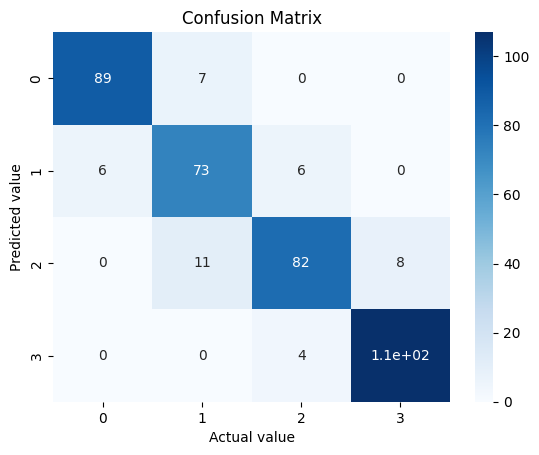

In [231]:
# Ploting the confusion matrix report
ax=sns.heatmap(cm_test,annot=True,cmap='Blues')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Actual value')
ax.set_ylabel('Predicted value')
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])
plt.show()

In [232]:
# Evalution martrix score chart- Classification report
print(classification_report(train_random_cv_pred,y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       399
           1       0.99      0.99      0.99       400
           2       0.99      0.99      0.99       400
           3       1.00      1.00      1.00       371

    accuracy                           1.00      1570
   macro avg       1.00      1.00      1.00      1570
weighted avg       1.00      1.00      1.00      1570



In [233]:
print(classification_report(test_random_cv_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93        96
           1       0.80      0.86      0.83        85
           2       0.89      0.81      0.85       101
           3       0.93      0.96      0.95       111

    accuracy                           0.89       393
   macro avg       0.89      0.89      0.89       393
weighted avg       0.89      0.89      0.89       393



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No after used the cross validation its didnot perform well.

### Support vector machine

In [234]:
# ML Model - 4 Implementation
from sklearn import svm
svm_classifier=svm.SVC(probability=True)
# Fit the Algorithm
svm_classifier.fit(x_train,y_train)
# Predict on the model
train_svm_pred=svm_classifier.predict(x_train)
test_svm_pred=svm_classifier.predict(x_test)

In [235]:
#  Evaluation Metric Score chart- Accuracy score
accuracy_score(train_svm_pred,y_train)

0.9726114649681529

In [236]:
accuracy_score(test_svm_pred,y_test)

0.8651399491094147

In [237]:
#  Evaluation Metric Score chart- Confusion matrix
cm_train=confusion_matrix(train_svm_pred,y_train)
cm_train

array([[395,   2,   0,   0],
       [  4, 392,  15,   0],
       [  0,   6, 381,  13],
       [  0,   0,   3, 359]])

In [238]:
cm_test=confusion_matrix(test_svm_pred,y_test)
cm_test

array([[ 88,   7,   0,   0],
       [  7,  73,  10,   0],
       [  0,  11,  77,  13],
       [  0,   0,   5, 102]])

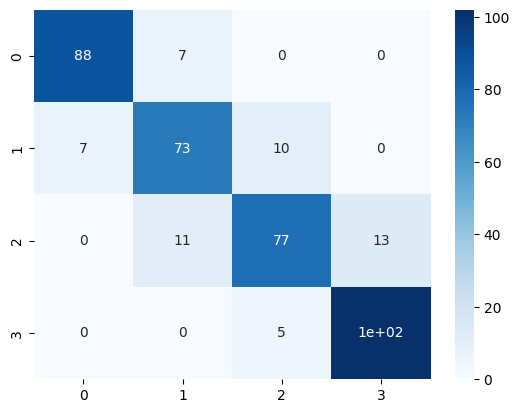

In [239]:
# Ploting the confusion matrix
ax=sns.heatmap(cm_test,annot=True,cmap='Blues')
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])
plt.show()

### Comparision of all the models

In [240]:
# Creating a dictionary
comparision_dict={'Model_name':['Logistic regression','Decision tree','Random Forest','Support vector machine'],
                  'Training_accuracy':[0.95,0.94,0.995,0.97],'Test_accuracy':[0.93,0.87,0.85,0.87]}

In [241]:
# Creating a dataframe
comparision_df=pd.DataFrame(comparision_dict)

In [242]:
comparision_df

,Model_name,Training_accuracy,Test_accuracy
0,Logistic regression,0.950,0.93
1,Decision tree,0.940,0.87
2,Random Forest,0.995,0.85
3,Support vector machine,0.970,0.87


<Axes: xlabel='Model_name', ylabel='Training_accuracy'>

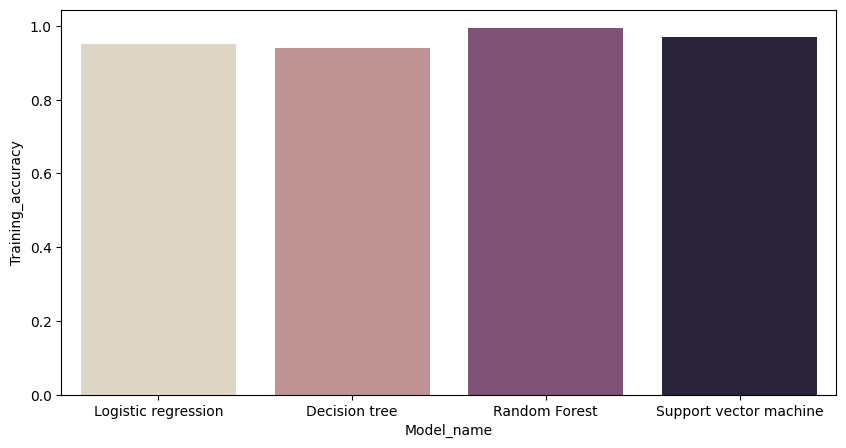

In [243]:
# Ploting the traing accuracy of different models
plt.figure(figsize=(10,5))
sns.barplot(data=comparision_df, x='Model_name', y='Training_accuracy', palette='ch:s=-.2,r=.6')

<Axes: xlabel='Model_name', ylabel='Test_accuracy'>

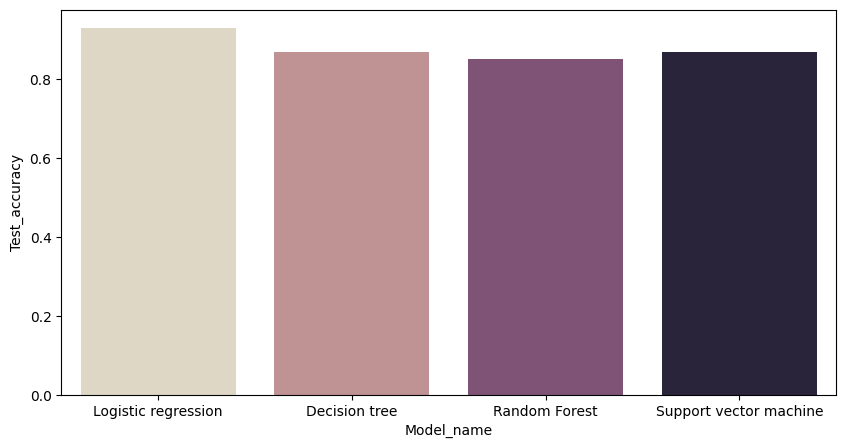

In [244]:
# Ploting the test accuracy of different models
plt.figure(figsize=(10,5))
sns.barplot(data=comparision_df, x='Model_name', y='Test_accuracy', palette='ch:s=-.2,r=.6')

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

We used different type of evaluation matrix such as accuracy score, confusion matrix and classification report. According to business you can check which matrix is important. 
Accuracy score shows the how accurate the prediction model is. And confusion matrix give the clear image of the data which includes the true positive, true negetive, false positive, false negetive. 
Classification report show the precision and recall in which you can consider for which is important for business point of view.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I have created the different models such as logistic regression, decision tree, random forest and support vector machine. But as we check better model performance of logistic regression. 

# **Conclusion**

From all the above graphical visualisation shows that Logistic Regression is best model for production purpose.
As observed Logistic Regression and decision tree model performs well along with support vector machine .
Out of all the model Logistic Regression is perform well on overall basis.
Ram, Battery power, Mobile weight, Screen size and Pixels are key features in predicting the mobile price range.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***